# Predict CO2 Emissions in Rwanda
This notebook is first attempt at kaggle competitions.  
*Made by Michał Jurzak, Mikołaj Hojda, Eryk Mikołajek*  
*Inspired by [Getting Started: EDA](https://www.kaggle.com/code/inversion/getting-started-eda#notebook-container)*
  
  
### Overview of the problem:
>The ability to accurately monitor carbon emissions is a critical step in the fight against climate change. Precise carbon readings allow researchers and governments to understand the sources and patterns of carbon mass output. While Europe and North America have extensive systems in place to monitor carbon emissions on the ground, there are few available in Africa. 
### Objective:
>The objective of this challenge is to create a machine learning models using open-source CO2 emissions data from Sentinel-5P satellite observations to predict future carbon emissions.

# Setup

In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

For reproducibility let us set seed.

Let's load and peak the data.

In [2]:
path = "../datasets/playground-series-s3e20/"
train=pd.read_csv(os.path.join(path, "train.csv"))
test=pd.read_csv(os.path.join(path, "test.csv"))
sample_submission=pd.read_csv(os.path.join(path, "sample_submission.csv"))
train.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             3664.436218               61085.809570              2615.120483   
1             3651.190311               66969.478735              3174.572424   
2             4216.986492               60068.894448              3516.282669   
3             5228.507736               51064.547339              4180.973322   
4             3980.598120               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  
0                -138.786423                 30.752140  3.750994  
1                -145.183930                 27.251779  4.025176  
2                -142.519545                 26.193296  4.231381  
3                -132.665828                 28.829155  4.305286  
4                -141.509805                 22.204612  4.347317  

[5 rows x 76 columns]

In [3]:
test.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0   
1  ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1   
2  ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2   
3  ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3   
4  ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4   

   SulphurDioxide_SO2_column_number_density  \
0                                       NaN   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                           NaN   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                             NaN   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                            NaN                                  NaN  ...   
1                       0.000000                            76.239196  ...   
2                       0.079870                           -42.055341  ...   
3                       0.201028                            72.169566  ...   
4                       0.204352                            76.190865  ...   

   Cloud_cloud_top_pressure  Cloud_cloud_top_height  \
0              36022.027344             8472.313477   
1              48539.737242             6476.147323   
2              34133.080469             8984.795703   
3              50854.991076             6014.724059   
4              46594.685145             6849.280477   

   Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0               41047.937500              7472.313477   
1               54915.708579              5476.147161   
2               39006.093750              7984.795703   
3               57646.368368              5014.724115   
4               52896.541873              5849.280394   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                   7.935617              0.240773   
1                  11.448437              0.293119   
2                  10.753179              0.267130   
3                  11.764556              0.304679   
4                  13.065317              0.284221   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                 -100.113792                  33.697044   
1                  -30.510319                  42.402593   
2                   39.087361                  45.936480   
3                  -24.465127                  42.140419   
4                  -12.907850                  30.122641   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  
0                -133.047546                 33.779583  
1                -138.632822                 31.012380  
2                -144.784988                 26.743361  
3                -135.027891                 29.604774  
4                -135.500119                 26.276807  

[5 rows x 75 columns]

In [4]:
sample_submission.head()

ID_LAT_LON_YEAR_WEEK  emission
0  ID_-0.510_29.290_2022_00     81.94
1  ID_-0.510_29.290_2022_01     81.94
2  ID_-0.510_29.290_2022_02     81.94
3  ID_-0.510_29.290_2022_03     81.94
4  ID_-0.510_29.290_2022_04     81.94

In [5]:
train.shape, test.shape, sample_submission.shape

((79023, 76), (24353, 75), (24353, 2))

In test obviously we don't have labels

In [6]:
train.shape[0]/(train.shape[0] + test.shape[0])

0.7644230769230769

Train is about 76% of the whole dataset and test about 24%.

In [7]:
train[['latitude', 'longitude']].value_counts().count(), test[['latitude', 'longitude']].value_counts().count()

(497, 497)

There are the same points in train and in test

# Statistics

In [8]:
train.describe(include='all') # all columns are included (NaNs too)

ID_LAT_LON_YEAR_WEEK      latitude     longitude          year  \
count                      79023  79023.000000  79023.000000  79023.000000   
unique                     79023           NaN           NaN           NaN   
top     ID_-0.510_29.290_2019_00           NaN           NaN           NaN   
freq                           1           NaN           NaN           NaN   
mean                         NaN     -1.891072     29.880155   2020.000000   
std                          NaN      0.694522      0.810375      0.816502   
min                          NaN     -3.299000     28.228000   2019.000000   
25%                          NaN     -2.451000     29.262000   2019.000000   
50%                          NaN     -1.882000     29.883000   2020.000000   
75%                          NaN     -1.303000     30.471000   2021.000000   
max                          NaN     -0.510000     31.532000   2021.000000   

             week_no  SulphurDioxide_SO2_column_number_density  \
count   79023.000000                              64414.000000   
unique           NaN                                       NaN   
top              NaN                                       NaN   
freq             NaN                                       NaN   
mean       26.000000                                  0.000048   
std        15.297155                                  0.000272   
min         0.000000                                 -0.000996   
25%        13.000000                                 -0.000096   
50%        26.000000                                  0.000024   
75%        39.000000                                  0.000153   
max        52.000000                                  0.004191   

        SulphurDioxide_SO2_column_number_density_amf  \
count                                   64414.000000   
unique                                           NaN   
top                                              NaN   
freq                                             NaN   
mean                                        0.834848   
std                                         0.185382   
min                                         0.241822   
25%                                         0.705817   
50%                                         0.809118   
75%                                         0.942792   
max                                         1.885239   

        SulphurDioxide_SO2_slant_column_number_density  \
count                                     64414.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                          0.000035   
std                                           0.000206   
min                                          -0.000887   
25%                                          -0.000078   
50%                                           0.000019   
75%                                           0.000121   
max                                           0.004236   

        SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                    64414.000000                         64414.000000   
unique                            NaN                                  NaN   
top                               NaN                                  NaN   
freq                              NaN                                  NaN   
mean                         0.158418                            -7.925870   
std                          0.071364                            64.263368   
min                          0.000000                          -179.537059   
25%                          0.110535                           -56.782383   
50%                          0.161855                           -12.441726   
75%                          0.211824                            72.059990   
max                          0.299998                 

Conclusions from the descriptions:
- The data ranges from 2019 to 2021.
- Emissions range from 0 to 3167.77.
- There are a lot of features with very different scales (like SulphurDioxide_SO2_column_number_density ranging from -0.000996 to 0.004191 and Cloud_cloud_top_height with range from 1050.661782 to 12384.239458)
- Weeks are numbered from 0 to 52.
- Latitude and longitude varies, so later it is needed to visualize later how the measurements are distributed based on location.

The units are unknown.

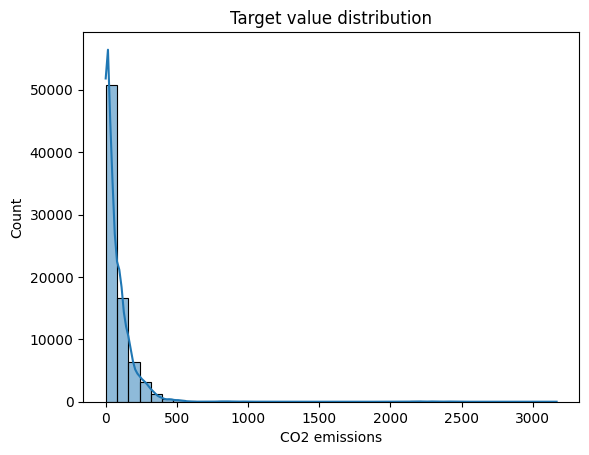

In [9]:
import seaborn as sns
sns.histplot(train['emission'], kde=True, bins=40)
plt.title("Target value distribution")
plt.xlabel("CO2 emissions")
plt.ylabel("Count")
plt.show()

The data looks very imbalanced. Maybe logarithmic transformation could be useful.

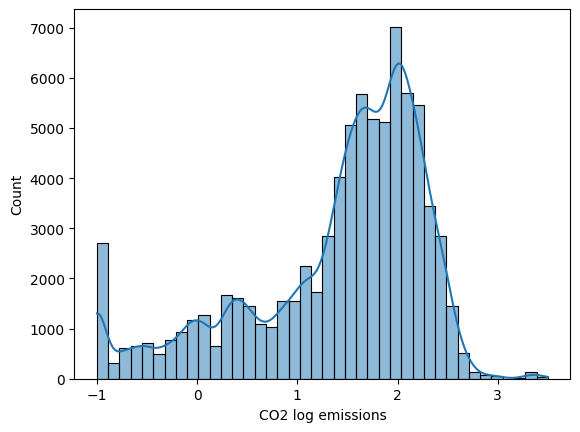

In [10]:
log_emissions = np.log10(train['emission']+.1)
sns.histplot(log_emissions, kde=True, bins=40)
plt.xlabel("CO2 log emissions")
plt.ylabel("Count")
plt.show()

In [11]:
emission_zeros=train['emission'].where(train['emission']==0).count() # min value
percent = emission_zeros/train['emission'].count()*100
print(f'{emission_zeros} zero values - {percent:.3f}% of the whole dataset')

2385 zero values - 3.018% of the whole dataset


As we see on the graph above, the zero values are significant and not really fitting for the current distribution. Logically, there is little to no chance of a Country not releasing any emissions.  
We have to check this later looking at geographical measurement points.

# Outliers
There are probably some extreme outliers, because the median value is 45.59, at 3rd quartile 109.54 and maximum value is 3167.76 (extreme).

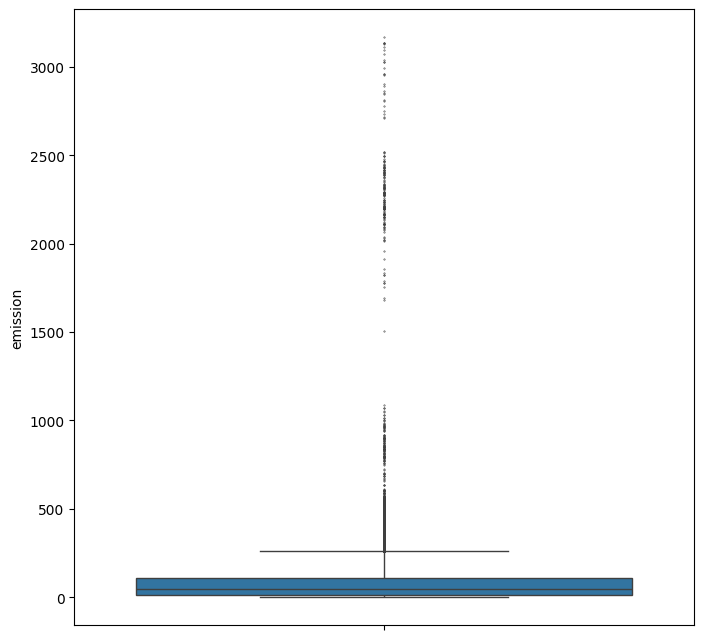

In [12]:
plt.figure(figsize=(8,8))
sns.boxplot(train['emission'], fliersize=0.4)
plt.show()

In [13]:
from scipy.stats import zscore
import math
scored_emissions = zscore(train['emission'])
outliers = scored_emissions.where(lambda x: (abs(x)>=3))
outliers = outliers[~np.isnan(outliers)]
outlier_count = outliers.count()
outlier_count

452

Using zscore we determined that there are 452 outliers.

In [14]:
outlier_count/train['emission'].count()*100

0.5719853713475823

That is 0.57% which is not much, we can drop them.

## Dropping outliers? Doesn't seem like a good idea I think

In [15]:
train_cpy = train.copy()

In [16]:
train_cpy['zscore']=zscore(train['emission'])
display(train_cpy[['emission', 'zscore']].head())
train_cpy.drop(train_cpy[abs(train_cpy['zscore'])>=3].index, inplace=True)
train_cpy.reset_index(drop=True)

emission    zscore
0  3.750994 -0.541859
1  4.025176 -0.539959
2  4.231381 -0.538530
3  4.305286 -0.538018
4  4.347317 -0.537726

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0      ID_-0.510_29.290_2019_00    -0.510     29.290  2019        0   
1      ID_-0.510_29.290_2019_01    -0.510     29.290  2019        1   
2      ID_-0.510_29.290_2019_02    -0.510     29.290  2019        2   
3      ID_-0.510_29.290_2019_03    -0.510     29.290  2019        3   
4      ID_-0.510_29.290_2019_04    -0.510     29.290  2019        4   
...                         ...       ...        ...   ...      ...   
78566  ID_-3.299_30.301_2021_48    -3.299     30.301  2021       48   
78567  ID_-3.299_30.301_2021_49    -3.299     30.301  2021       49   
78568  ID_-3.299_30.301_2021_50    -3.299     30.301  2021       50   
78569  ID_-3.299_30.301_2021_51    -3.299     30.301  2021       51   
78570  ID_-3.299_30.301_2021_52    -3.299     30.301  2021       52   

       SulphurDioxide_SO2_column_number_density  \
0                                     -0.000108   
1                                      0.000021   
2                                      0.000514   
3                                           NaN   
4                                     -0.000079   
...                                         ...   
78566                                  0.000284   
78567                                  0.000083   
78568                                       NaN   
78569                                 -0.000034   
78570                                 -0.000091   

       SulphurDioxide_SO2_column_number_density_amf  \
0                                          0.603019   
1                                          0.728214   
2                                          0.748199   
3                                               NaN   
4                                          0.676296   
...                                             ...   
78566                                      1.195643   
78567                                      1.130868   
78568                                           NaN   
78569                                      0.879397   
78570                                      0.871951   

       SulphurDioxide_SO2_slant_column_number_density  \
0                                           -0.000065   
1                                            0.000014   
2                                            0.000385   
3                                                 NaN   
4                                           -0.000048   
...                                               ...   
78566                                        0.000340   
78567                                        0.000063   
78568                                             NaN   
78569                                       -0.000028   
78570                                       -0.000079   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                           0.255668                           -98.593887   
1                           0.130988                            16.592861   
2                           0.110018                            72.795837   
3                                NaN                                  NaN   
4                           0.121164                             4.121269   
...                              ...                                  ...   
78566                       0.191313                            72.820518   
78567                       0.177222                           -12.856753   
78568                            NaN                                  NaN   
78569                       0.184209                          -100.344827   
78570                       0.000000                            76.825638   

       ...  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0      ...               61085.809570              2615.120483   
1      ...               66969.478735              3174.572424   
2      ...               60068.894448              3516.282669   
3      ...

# Missing values
We can see many NaNs in previous DataFrames, hence let's see how much are there.

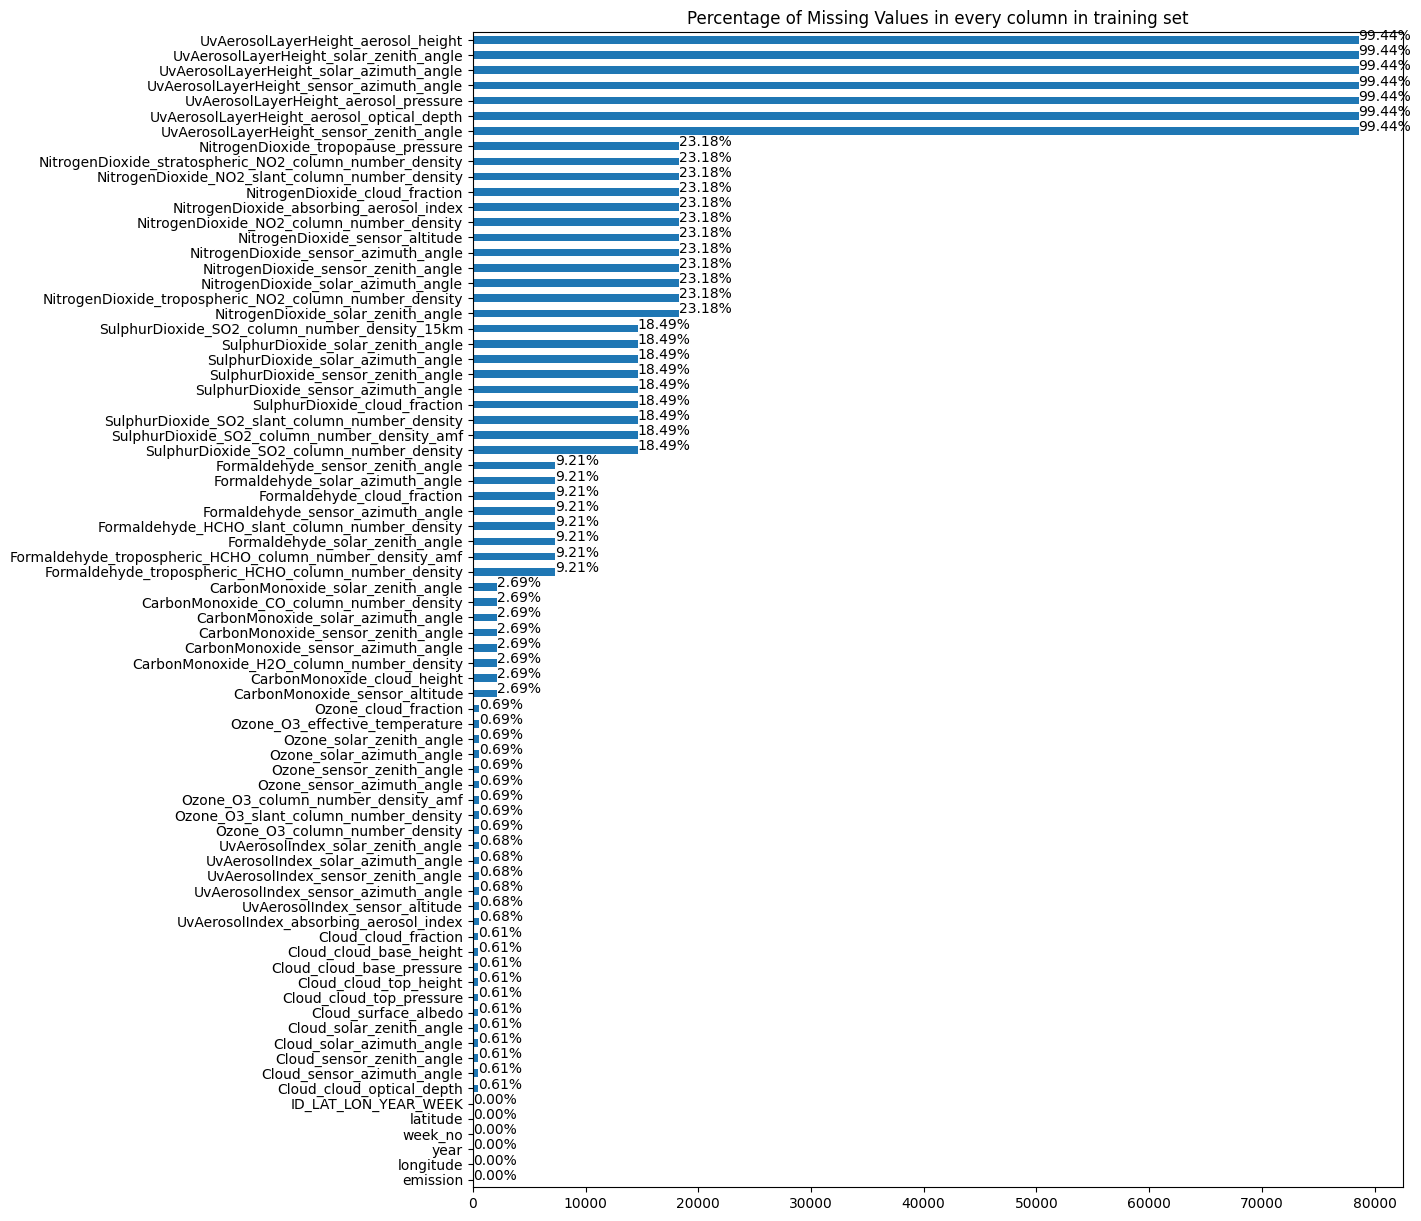

In [17]:
ax = train.isna().sum().sort_values(ascending = False)[::-1].plot(kind = 'barh', figsize = (12, 15))
plt.title('Percentage of Missing Values in every column in training set')
for p in ax.patches:
    percentage ='{:,.2f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

As we can see, the missing values are sorted and all the same values are closely related with each other i.e. the variable name starts the same every time, thus we can deduce null or NaN values are related with the source of particular data features.  
The features that have 99.44% of the data missing are probably not useful, let's drop them by adding a custom Transformer

In [18]:
test.shape, train.shape

((24353, 75), (79023, 76))

7 features were dropped

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.cols_to_drop=columns
        return None
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop(self.cols_to_drop, axis=1)
    
dropper=FeatureDropper([''])

Other features we should not delete and instead use imputation for the mean, median or mode. Let's use mode and SimpleImputation.

Duplicate values?

In [20]:
train.duplicated().any(), test.duplicated().any()

(False, False)

plan:
- first use SimpleImputer for every column
- explore data:
  - number of measurements each week.
  - visualization on the map
    - use dot size to indicate the size of emissions
    - use color for year indication
    - (interactive?)
  - correlation between features
    - plot the most promising features of emissions to visualize correlation
  
- create pipeline
  - simple scaling
  - simple imputation

In [21]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

imptr = IterativeImputer()
t_id = train['ID_LAT_LON_YEAR_WEEK']
tt_id = test['ID_LAT_LON_YEAR_WEEK']
train = pd.DataFrame(imptr.fit_transform(train.drop('ID_LAT_LON_YEAR_WEEK', axis=1)), columns=imptr.get_feature_names_out(train.drop('ID_LAT_LON_YEAR_WEEK', axis=1).columns))
test = pd.DataFrame(imptr.fit_transform(test.drop('ID_LAT_LON_YEAR_WEEK', axis=1)), columns=imptr.get_feature_names_out(test.drop('ID_LAT_LON_YEAR_WEEK', axis=1).columns))
train['ID_LAT_LON_YEAR_WEEK'] = t_id
test['ID_LAT_LON_YEAR_WEEK'] = tt_id

train.isnull().sum().any(), test.isnull().sum().any() 

c:\Users\juziu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


(False, False)

Data in test is still not imputed but that will be worked out later when we create a pipeline

# Exploratory Data Analysis (EDA)

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\1168731853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'week_no', data = train, palette="muted")


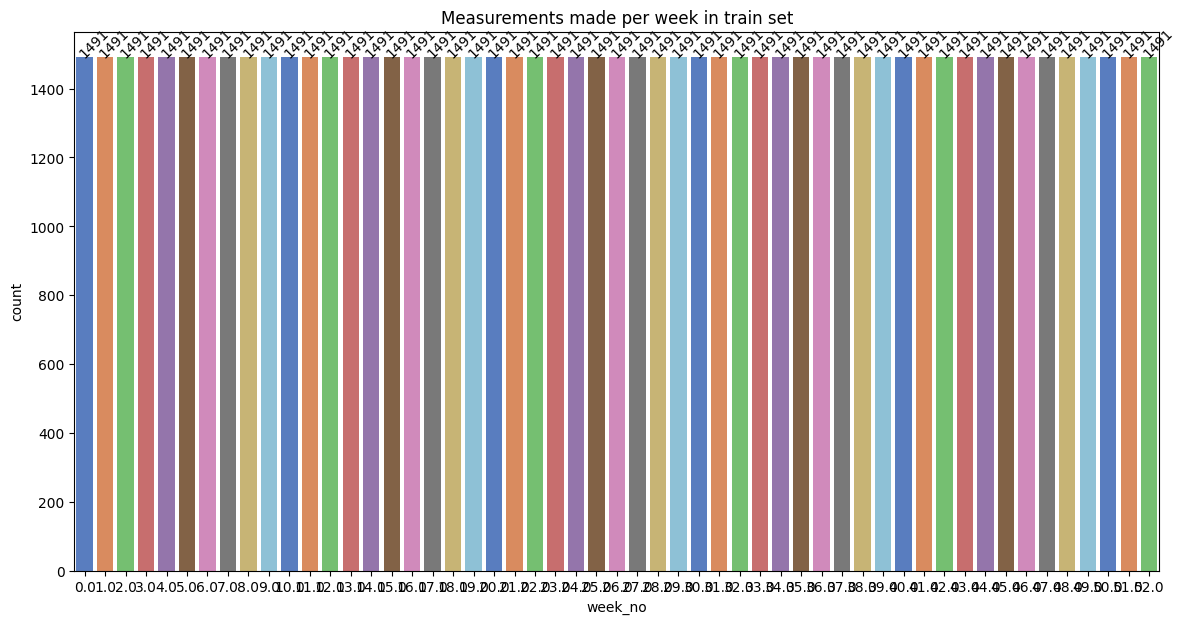

In [22]:
plt.figure(figsize = (14, 7))
ax = sns.countplot(x = 'week_no', data = train, palette="muted")
plt.title('Measurements made per week in train set')
for p in ax.patches:
    width, height =p.get_width(),p.get_height()
    amount ='{:.0f}'.format(height)
    x=p.get_x()
    y=p.get_y()+height
    
    ax.annotate(amount,(x,y), rotation=45)

plt.show()

In [23]:
1491/7

213.0

Every week the number of measurements is the same (1491) we dont have data everyday but we can assume with the homogeneous distribution that everyday was the same amount too, so 213 measurements every day.

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\1409703601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'year', data = train, palette="muted")


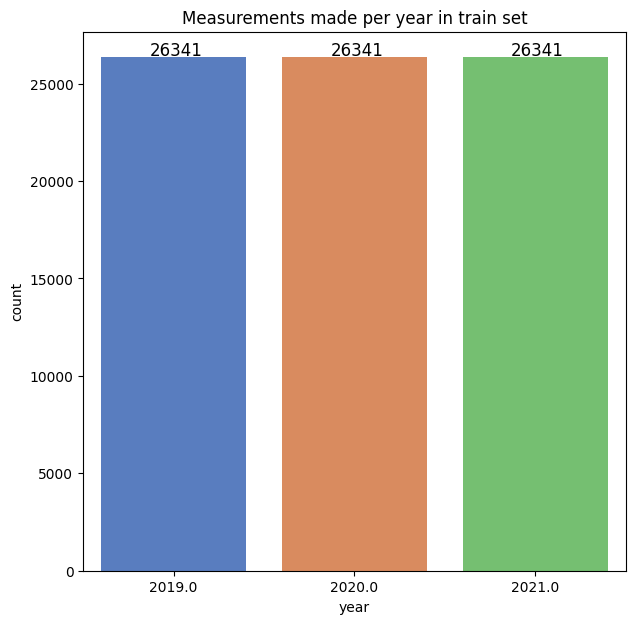

In [24]:
plt.figure(figsize = (7, 7))
ax = sns.countplot(x = 'year', data = train, palette="muted")
plt.title('Measurements made per year in train set')
for p in ax.patches:
    width, height =p.get_width(),p.get_height()
    amount ='{:.0f}'.format(height)
    x=p.get_x()+width/3
    y=p.get_y()+height+100
    
    ax.annotate(amount,(x,y), size=12)

plt.show()

Let's see how the emissions are distributed through the year

[2019. 2020. 2021.]


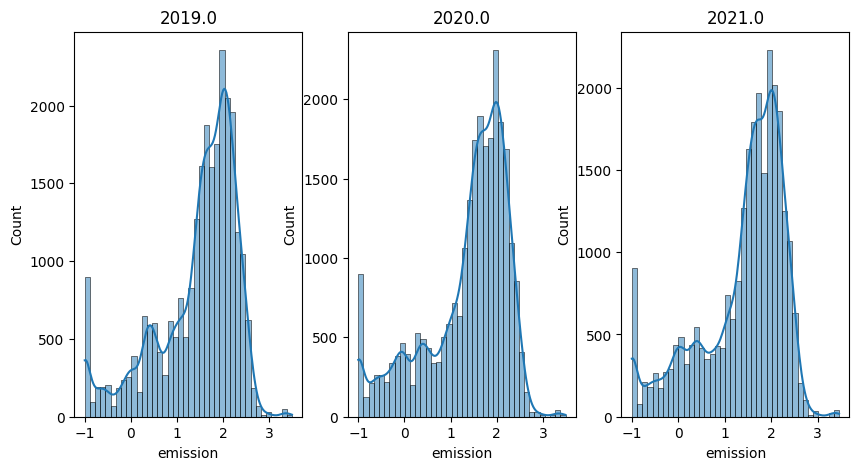

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
print(train['year'].unique())
for i, year in enumerate(train['year'].unique()):
    log_emissions = np.log10((train[train['year']==year]['emission']+.1).astype(float))
    sns.histplot(log_emissions, kde=True, bins=40, ax=axs[i]).set(title=year)
plt.show()

Emissions are very similar through these years. Let's see how the volume looks like.

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\1796173853.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=train, x="year", y="emission", palette="muted")


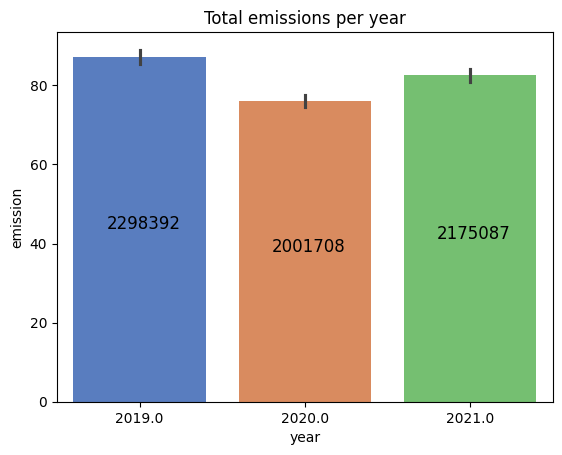

In [26]:
year_sum = []
for year in train['year'].unique():
    s=train[train['year']==year]['emission'].sum()
    year_sum.append(s)

ax = sns.barplot(data=train, x="year", y="emission", palette="muted")
plt.title("Total emissions per year")
for i, p in enumerate(ax.patches):
    width, height = p.get_width(),p.get_height()
    amount ='{:.0f}'.format(year_sum[i])
    x=p.get_x()+width/4
    
    y=p.get_y()+height/2
    
    ax.annotate(amount,(x,y), size=12)

plt.show()

Let's check locations and if the measurements were taken in different places.

In [27]:
for year in train['year'].unique():
    loc_year = train[train['year']==year][['latitude', 'longitude']]
    print(f'{year}: {loc_year.value_counts().count()}')

2019.0: 497
2020.0: 497
2021.0: 497


There are just 497 unique points of measurements. We can check if that is related to weeks:  
Number of measurements every week (cumulative through 3 yrs) over number of unique points

Let's see how much emissions were made each week

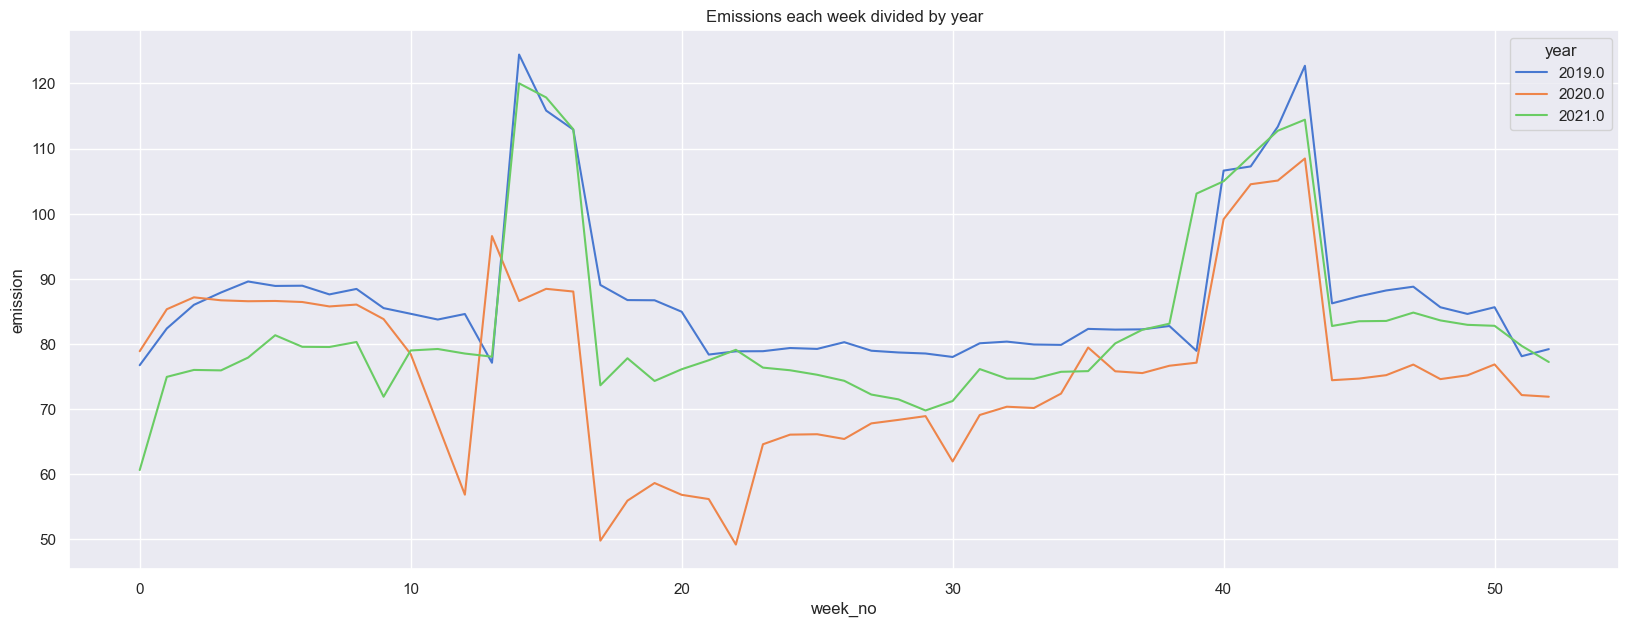

In [28]:
sns.set(rc={'figure.figsize':(20,7)})
sns.lineplot(data=train, x="week_no", y="emission", palette="muted", hue="year", errorbar=None)
plt.title("Emissions each week divided by year")
plt.show()

# Geographical 
We can use geopandas to help us visualize some geographical correlations.

In [29]:
import geopandas as gpd
# Eryk's code
geo_df = gpd.GeoDataFrame(train, geometry=gpd.points_from_xy(train.longitude, train.latitude))
geo_df.crs = {'init': 'EPSG:4326'}
geo_df.drop(['longitude', 'latitude'], axis=1, inplace=True)
geo_df.head()

c:\Users\juziu\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\3321523002.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch shoul

year  week_no  SulphurDioxide_SO2_column_number_density  \
0  2019.0      0.0                                 -0.000108   
1  2019.0      1.0                                  0.000021   
2  2019.0      2.0                                  0.000514   
3  2019.0      3.0                                  0.000057   
4  2019.0      4.0                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                      0.701939   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                        0.000038   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.255668                           -98.593887   
1                       0.130988                            16.592861   
2                       0.110018                            72.795837   
3                       0.188336                             2.832126   
4                       0.121164                             4.121269   

   SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                           50.843559                         -130.050797   
1                           39.137194                         -140.874435   
2                           52.868816                         -150.191757   
3                           43.000636                         -138.008725   
4                           35.515587                         -137.409159   

   SulphurDioxide_solar_zenith_angle  ...  Cloud_cloud_base_height  \
0                          35.874496  ...              2615.120483   
1                          28.965133  ...              3174.572424   
2                          23.206415  ...              3516.282669   
3                          27.372867  ...              4180.973322   
4                          24.331972  ...              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  \
0                -138.786423                 30.752140  3.750994   
1                -145.183930                 27.251779  4.025176   
2                -142.519545                 26.193296  4.231381   
3                -132.665828                 28.829155  4.305286   
4                -141.509805                 22.204612  4.347317   

       ID_LAT_LON_YEAR_WEEK                   geometry  
0  ID_-0.510_29.290_2019_00  POINT (29.29000 -0.51000)  
1  ID_-0.510_29.290_2019_01  POINT (29.29000 -0.51000)  
2  ID_-0.510_29.290_2019_02  POINT (29.29000 -0.51000)  
3  ID_-0.510_29.290_2019_03  POINT (29.29000 -0.51000)  
4  ID_-0.510_29.290_2019_04  POINT (29.29000 -0.51000)  

[5 rows x 75 columns]

In [30]:
def if_zero(number):
    if number==0:
        return 0.1
    return number

geo_df['emission'] = geo_df['emission'].apply(if_zero)

Let's see how much by country there are points

In [31]:
from geopy.geocoders import Nominatim

geolocator  = Nominatim(user_agent="geoapiExercises")

In [32]:
latlong = (train.loc[0].latitude, train.loc[0].longitude)

location = geolocator.reverse((latlong[0], latlong[1]))
location

Location(Taliha, Lubero, Nord-Kivu, République démocratique du Congo, (-0.5193765, 29.3267865, 0.0))

In [33]:
print(location)

Taliha, Lubero, Nord-Kivu, République démocratique du Congo


In [34]:
list_of_locations = pd.DataFrame({"point": list(train[['latitude','longitude']].value_counts().index)})
list_of_locations.head()

point
0  (-3.299, 30.301)
1    (-1.51, 29.89)
2  (-1.429, 30.971)
3  (-1.429, 30.171)
4  (-1.444, 30.856)

In [43]:
list_of_locations['country'] = None
list_cpy = []
for i, r in list_of_locations.iterrows():
    not_success = True
    while not_success:
        try:
            r['country'] = geolocator.reverse(str(r.point[0])+","+str(r.point[1]))
            list_cpy.append(r['country'])
            not_success=False
        except Exception as e:
            print(f'Not succesful: {r.point}, {e}')
list_of_locations['country'] = pd.Series(list_cpy)


In [44]:
list_of_locations['country'].isna().value_counts()

country
False    497
Name: count, dtype: int64

In [45]:
list_of_locations['country']

0      (Nyankanda, Ruyigi, Burundi, (-3.2964835, 30.3...
1      (Rwerere, Akarere ka Burera, Majyaruguru, Rwan...
2      (Karagwe, Kagera, Lake Zone, Tanzania, (-1.723...
3      (Gatunda, Nyagatare District, Iburasirasuba, R...
4      (R101, Nkwenda, Kagenyi, Kyerwa, Kagera, Lake ...
                             ...                        
492    (DR87, Busoro, Nyanza, Amajvepfo, Rwanda, (-2....
493    (Ecole primaire Muhumba, Avenue du lac, Ntalan...
494    (Musange, Nyamagabe, Amajvepfo, Rwanda, (-2.29...
495    (Mugano, Nyamagabe, Amajvepfo, Rwanda, (-2.279...
496    (Taliha, Lubero, Nord-Kivu, République démocra...
Name: country, Length: 497, dtype: object

In [46]:
list_of_locations['country'][0][0]

'Nyankanda, Ruyigi, Burundi'

In [47]:
def extract_country(string):
    return re.search(r'\b(\w+)\s*$', string).group(1)

print(extract_country(list_of_locations.iloc[0]['country'][0]))

list_of_locations['country_name'] = list_of_locations.apply(lambda x: extract_country(x['country'][0]), axis=1)
list_of_locations

Burundi


point                                            country  \
0    (-3.299, 30.301)  (Nyankanda, Ruyigi, Burundi, (-3.2964835, 30.3...   
1      (-1.51, 29.89)  (Rwerere, Akarere ka Burera, Majyaruguru, Rwan...   
2    (-1.429, 30.971)  (Karagwe, Kagera, Lake Zone, Tanzania, (-1.723...   
3    (-1.429, 30.171)  (Gatunda, Nyagatare District, Iburasirasuba, R...   
4    (-1.444, 30.856)  (R101, Nkwenda, Kagenyi, Kyerwa, Kagera, Lake ...   
..                ...                                                ...   
492    (-2.28, 29.92)  (DR87, Busoro, Nyanza, Amajvepfo, Rwanda, (-2....   
493  (-2.282, 29.018)  (Ecole primaire Muhumba, Avenue du lac, Ntalan...   
494  (-2.291, 29.609)  (Musange, Nyamagabe, Amajvepfo, Rwanda, (-2.29...   
495  (-2.293, 29.507)  (Mugano, Nyamagabe, Amajvepfo, Rwanda, (-2.279...   
496    (-0.51, 29.29)  (Taliha, Lubero, Nord-Kivu, République démocra...   

    country_name  
0        Burundi  
1         Rwanda  
2       Tanzania  
3         Rwanda  
4       Tanzania  
..           ...  
492       Rwanda  
493        Congo  
494       Rwanda  
495       Rwanda  
496        Congo  

[497 rows x 3 columns]

In [48]:
def apply_country_col(row_lat, row_lon):
    lat, lon = list_of_locations['point'][0]
    return list_of_locations[list_of_locations['point']==(row_lat, row_lon)]['country_name'].iloc[0]

train['country'] = train.apply(lambda x: apply_country_col(x['latitude'], x['longitude']), axis=1)
test['country'] = test.apply(lambda x: apply_country_col(x['latitude'], x['longitude']), axis=1)

train['country'].value_counts()

country
Rwanda      25281
Congo       19557
Tanzania    12879
Uganda      10971
Burundi     10335
Name: count, dtype: int64

<AxesSubplot: ylabel='count'>

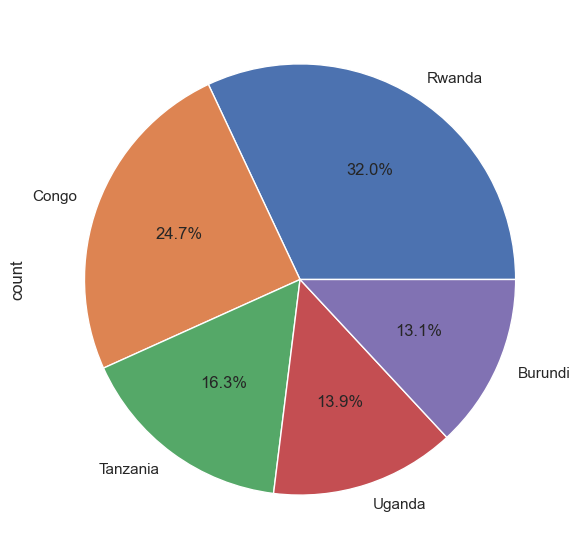

In [49]:
pd.Series(train['country'].value_counts()).plot(kind='pie', y='country', autopct='%1.1f%%')

[Text(0.5, 1.0, 'Emissions mean by country each week')]

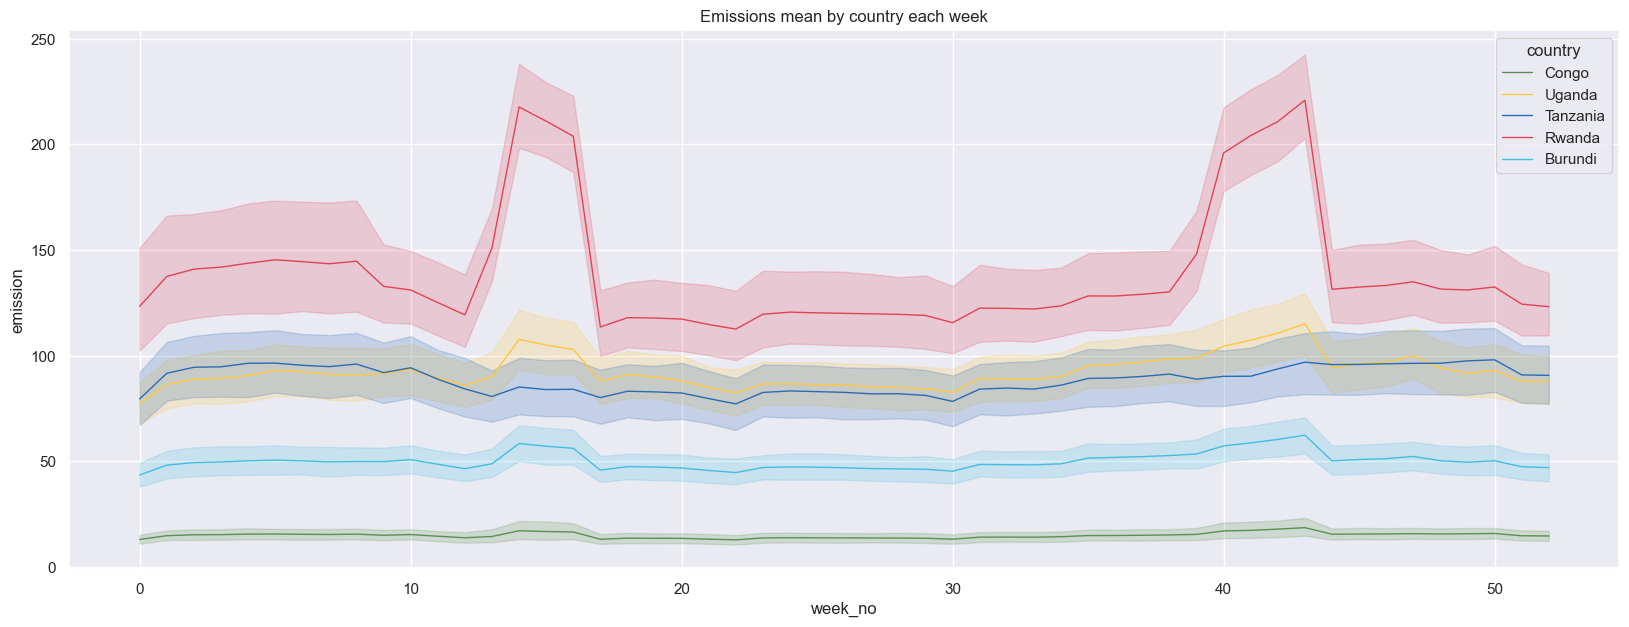

In [50]:
sns.lineplot(
    data=train, 
    x='week_no', 
    y='emission', 
    hue='country',
    palette=['#599150', '#ffc73b', '#2a6bb5', '#e34255', '#42bde3'], 
    linewidth=1,
    legend=True,
    estimator=np.mean
).set(title='Emissions mean by country each week')

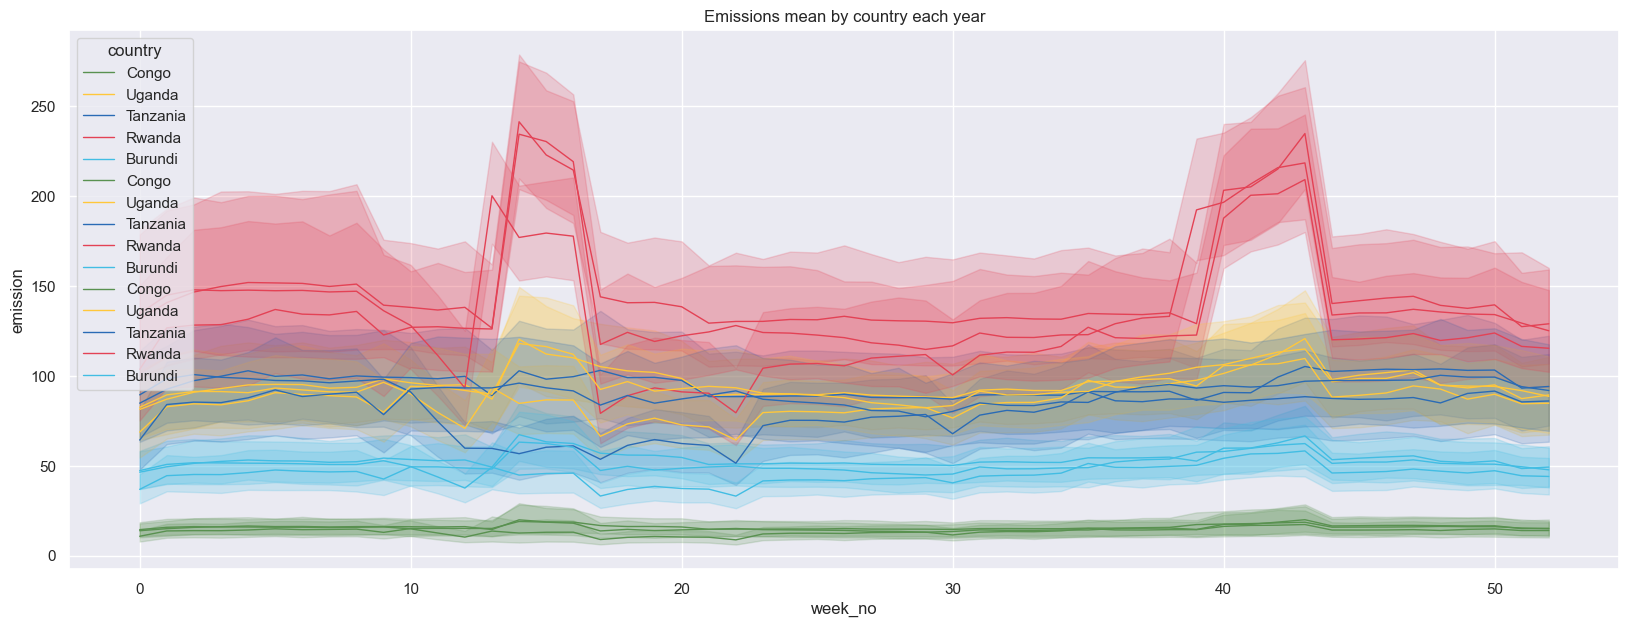

In [51]:
for year in train['year'].unique():
    sns.lineplot(
        data=train[train['year']==year], 
        x='week_no', 
        y='emission', 
        hue='country',
        palette=['#599150', '#ffc73b', '#2a6bb5', '#e34255', '#42bde3'], 
        linewidth=1,
        legend=True,
        estimator=np.mean
    ).set(title='Emissions mean by country each year')

Largest amount of locations (Rwanda) has the highest emissions. Second largest amount of locations (Congo) has the lowest emissions. Thus this is important to include countries of measurement to the dataset.

From @dmitryuarov [work](https://www.kaggle.com/code/dmitryuarov/ps3e20-rwanda-emission-advanced-fe-20-88?scriptVersionId=139509993) inspired to select 7 representative points:

In [57]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat_lon1, lat_lon2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, lon1 = lat_lon1
    lat2, lon2 = lat_lon2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [58]:
import datetime as dt
# from haversine import haversine

rwanda_center = (-1.9607, 29.9707)
park_biega = (-1.8866, 28.4518) 
kirumba = (-0.5658, 29.1714) 
massif = (-2.9677, 28.6469)
lake = (-1.9277, 31.4346)
mbarara = (-0.692, 30.602)
muy = (-2.8374, 30.3346)

def get_month(row):
    date = dt.datetime.strptime(f'{int(row["year"])}-{int(row["week_no"]+1)}-1', "%Y-%W-%w")
    return date.month

def get_id(row):
    return int(''.join(filter(str.isdigit, str(row['latitude']))) + ''.join(filter(str.isdigit, str(row['longitude']))))

def cluster_features(df, cluster_centers):
    for i, cc in enumerate(cluster_centers.values()):
        df[f'cluster_{i}'] = df.apply(lambda x: haversine((x['latitude'], x['longitude']), cc), axis=1)
    return df

train['id'] = train[['latitude', 'longitude']].apply(lambda row: get_id(row), axis=1)
test['id'] = test[['latitude', 'longitude']].apply(lambda row: get_id(row), axis=1)
new_ids = {id_: new_id for new_id, id_ in enumerate(train['id'].unique())}
train['id'] = train['id'].map(new_ids)
test['id'] = test['id'].map(new_ids)


def preprocessing(df):
    # Based of the dmitryuarov notebook the Ozone_solar_azimuth_angle indicator is the best from physico-chemical indicators.
    good_col = 'Ozone_solar_azimuth_angle'
    df[good_col] = df.groupby(['id', 'year'])[good_col].ffill().bfill()
    df[f'{good_col}_lag_1'] = df.groupby(['id', 'year'])[good_col].shift(1).fillna(0)

    df['rot_30_x'] = (np.cos(np.radians(30)) * df['longitude']) + \
                     (np.sin(np.radians(30)) * df['latitude'])

    df['rot_30_y'] = (np.cos(np.radians(30)) * df['latitude']) + \
                     (np.sin(np.radians(30)) * df['longitude'])
    
    for col, coors in zip(
        ['dist_rwanda', 'dist_park', 'dist_kirumba', 'dist_massif', 'dist_lake', 'dist_mbarara', 'dist_muy'], 
        [rwanda_center, park_biega, kirumba, massif, lake, mbarara, muy]
    ):
        df[col] = df.apply(lambda x: haversine((x['latitude'], x['longitude']), coors), axis=1)
    
    df['month'] = df[['year', 'week_no']].apply(lambda row: get_month(row), axis=1)
    df['is_covid'] = (df['year'] == 2020) & (df['month'] > 2) | (df['year'] == 2021) & (df['month'] == 1)
    df['is_lockdown'] = (df['year'] == 2020) & ((df['month'].isin([3,4])))
    df['is_covid_peak'] = (df['year'] == 2020) & ((df['month'].isin([4,5,6])))
    df['is_covid_dis_peak'] = (df['year'] == 2021) & ((df['month'].isin([7,8,9])))
    df['public_holidays'] = (df['week_no'].isin([0, 51, 12, 30]))

    return df
    

In [59]:
test.shape

(24353, 77)

In [60]:
train.reset_index(drop=True)
test.reset_index(drop=True)

train = preprocessing(train)
test = preprocessing(test)

In [61]:
from sklearn.cluster import KMeans

df = pd.concat([train, test], axis=0, ignore_index=True)
coordinates = df[['latitude', 'longitude']].values
clustering = KMeans(n_clusters=12, max_iter=1000, random_state=0).fit(coordinates)
cluster_centers = {i: tuple(centroid) for i, centroid in enumerate(clustering.cluster_centers_)}
df = cluster_features(df, cluster_centers)

# train.drop('ID_LAT_LON_YEAR_WEEK', axis=1, inplace=True)
# test.drop('ID_LAT_LON_YEAR_WEEK', axis=1, inplace=True)

c:\Users\juziu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
test.shape

(24353, 93)

In [63]:
df.reset_index(inplace=True, drop=True)

In [64]:
train = df.iloc[:-len(test),:]
test = df.iloc[-len(test):,:]
del df

test = test.drop(['emission'], axis=1)

# In case anything is missing, I'm calling the missing value filling algorithm 
cont_missing=[f for f in train.columns if train[f].dtype!='O' and f not in ['emission']]
len(cont_missing)

103

In [65]:
train.shape, test.shape #ok shape

((79023, 106), (24353, 105))

In [66]:
test_backup, train_backup = test.copy(), train.copy()

In [67]:
# For backup
test, train = test_backup, train_backup

In [68]:
test.isna().sum().any(), train.isna().sum().any()

(False, False)

There are no NaN values, which is good

In [69]:
temp_cols_train = train[train.select_dtypes(['bool','object']).columns]
temp_cols_test = test[test.select_dtypes(['bool','object']).columns]
temp_cols_test

ID_LAT_LON_YEAR_WEEK  country  is_covid  is_lockdown  \
79023   ID_-0.510_29.290_2022_00    Congo     False        False   
79024   ID_-0.510_29.290_2022_01    Congo     False        False   
79025   ID_-0.510_29.290_2022_02    Congo     False        False   
79026   ID_-0.510_29.290_2022_03    Congo     False        False   
79027   ID_-0.510_29.290_2022_04    Congo     False        False   
...                          ...      ...       ...          ...   
103371  ID_-3.299_30.301_2022_44  Burundi     False        False   
103372  ID_-3.299_30.301_2022_45  Burundi     False        False   
103373  ID_-3.299_30.301_2022_46  Burundi     False        False   
103374  ID_-3.299_30.301_2022_47  Burundi     False        False   
103375  ID_-3.299_30.301_2022_48  Burundi     False        False   

        is_covid_peak  is_covid_dis_peak  public_holidays  
79023           False              False             True  
79024           False              False            False  
79025           False              False            False  
79026           False              False            False  
79027           False              False            False  
...               ...                ...              ...  
103371          False              False            False  
103372          False              False            False  
103373          False              False            False  
103374          False              False            False  
103375          False              False            False  

[24353 rows x 7 columns]

In [70]:
len(temp_cols_test.columns)

7

In [71]:
temp_cols_test.reset_index(inplace=True, allow_duplicates=False, drop=True)
temp_cols_train.reset_index(inplace=True, allow_duplicates=False, drop=True)

In [72]:
# imputing values (no NaNs)
# t_id = train['ID_LAT_LON_YEAR_WEEK']
# tt_id = test['ID_LAT_LON_YEAR_WEEK']

train.drop(temp_cols_train, inplace=True, axis=1)
test.drop(temp_cols_test, inplace=True, axis=1)

train.reset_index(inplace=True, allow_duplicates=False, drop=True)
test.reset_index(inplace=True, allow_duplicates=False, drop=True)
print(train.shape, test.shape)

t_names = train.columns
tt_names = test.columns
train = pd.DataFrame(imptr.fit_transform(train), columns=t_names)
test = pd.DataFrame(imptr.fit_transform(test), columns=tt_names)
print(train.shape, test.shape)

train.reset_index(inplace=True, allow_duplicates=False, drop=True), test.reset_index(inplace=True, allow_duplicates=False, drop=True)
train = pd.concat([train, temp_cols_train], axis=1, ignore_index=False)
test = pd.concat([test, temp_cols_test], axis=1, ignore_index=False)
print(train.shape, test.shape)

# train['ID_LAT_LON_YEAR_WEEK'] = t_id
# test['ID_LAT_LON_YEAR_WEEK'] = tt_id

train.isnull().sum().any(), test.isnull().sum().any() 

(79023, 99) (24353, 98)


(79023, 99) (24353, 98)
(79023, 106) (24353, 105)


(False, False)

In [73]:
if 'level_0' and 'index' in train.columns: train.drop(['level_0','index'], axis=1, inplace=True)
if 'level_0' and 'index' in test.columns: test.drop(['level_0','index'], axis=1, inplace=True)
test.head()

latitude  longitude    year  week_no  \
0     -0.51      29.29  2022.0      0.0   
1     -0.51      29.29  2022.0      1.0   
2     -0.51      29.29  2022.0      2.0   
3     -0.51      29.29  2022.0      3.0   
4     -0.51      29.29  2022.0      4.0   

   SulphurDioxide_SO2_column_number_density  \
0                                  0.000022   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.548806   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                        0.000009   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.127733                            51.932196   
1                       0.000000                            76.239196   
2                       0.079870                           -42.055341   
3                       0.201028                            72.169566   
4                       0.204352                            76.190865   

   SulphurDioxide_sensor_zenith_angle  ...   cluster_9  cluster_10  \
0                           34.075609  ...  150.141316   71.614678   
1                           15.600607  ...  150.141316   71.614678   
2                           39.889060  ...  150.141316   71.614678   
3                           58.862543  ...  150.141316   71.614678   
4                           15.646016  ...  150.141316   71.614678   

   cluster_11      ID_LAT_LON_YEAR_WEEK  country  is_covid  is_lockdown  \
0  218.170284  ID_-0.510_29.290_2022_00    Congo     False        False   
1  218.170284  ID_-0.510_29.290_2022_01    Congo     False        False   
2  218.170284  ID_-0.510_29.290_2022_02    Congo     False        False   
3  218.170284  ID_-0.510_29.290_2022_03    Congo     False        False   
4  218.170284  ID_-0.510_29.290_2022_04    Congo     False        False   

   is_covid_peak  is_covid_dis_peak  public_holidays  
0          False              False             True  
1          False              False            False  
2          False              False            False  
3          False              False            False  
4          False              False            False  

[5 rows x 105 columns]

In [74]:
train.head()

latitude  longitude    year  week_no  \
0     -0.51      29.29  2019.0      0.0   
1     -0.51      29.29  2019.0      1.0   
2     -0.51      29.29  2019.0      2.0   
3     -0.51      29.29  2019.0      3.0   
4     -0.51      29.29  2019.0      4.0   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                  0.000057   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                      0.701939   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                        0.000038   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                       0.255668                           -98.593887   
1                       0.130988                            16.592861   
2                       0.110018                            72.795837   
3                       0.188336                             2.832126   
4                       0.121164                             4.121269   

   SulphurDioxide_sensor_zenith_angle  ...   cluster_9  cluster_10  \
0                           50.843559  ...  150.141316   71.614678   
1                           39.137194  ...  150.141316   71.614678   
2                           52.868816  ...  150.141316   71.614678   
3                           43.000636  ...  150.141316   71.614678   
4                           35.515587  ...  150.141316   71.614678   

   cluster_11      ID_LAT_LON_YEAR_WEEK  country  is_covid  is_lockdown  \
0  218.170284  ID_-0.510_29.290_2019_00    Congo     False        False   
1  218.170284  ID_-0.510_29.290_2019_01    Congo     False        False   
2  218.170284  ID_-0.510_29.290_2019_02    Congo     False        False   
3  218.170284  ID_-0.510_29.290_2019_03    Congo     False        False   
4  218.170284  ID_-0.510_29.290_2019_04    Congo     False        False   

   is_covid_peak  is_covid_dis_peak  public_holidays  
0          False              False             True  
1          False              False            False  
2          False              False            False  
3          False              False            False  
4          False              False            False  

[5 rows x 106 columns]

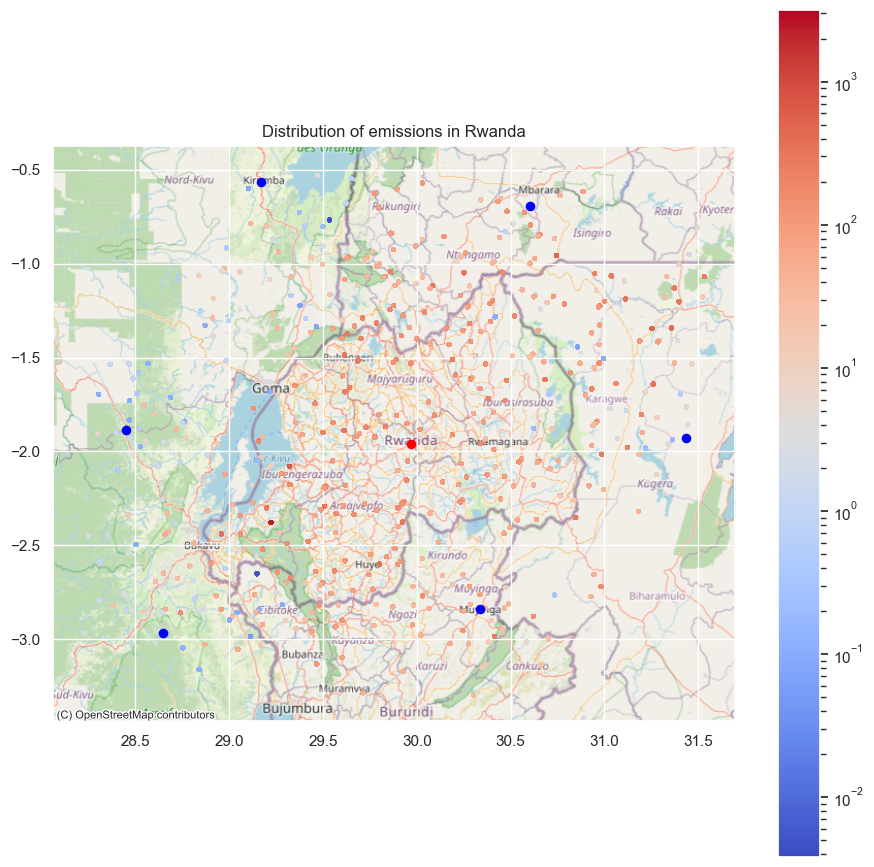

In [75]:
import matplotlib as mpl
import contextily as cx # for basemaps in geopandas plots

ax = geo_df.plot(column='emission', cmap='coolwarm', figsize=(11, 11), legend=True, norm=mpl.colors.LogNorm(), alpha=1, s=5)

for color, coors in zip(
    ['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'], 
    [rwanda_center, park_biega, kirumba, massif, lake, mbarara, muy]
):
    plt.scatter(x=coors[1], y=coors[0], s=35, color=color)

ax.set_title(f'Distribution of emissions in Rwanda')
cx.add_basemap(ax, crs=geo_df.crs, source=cx.providers.OpenStreetMap.Mapnik)
plt.show()

Time series for every location taken from [@ambrosm work](https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense)

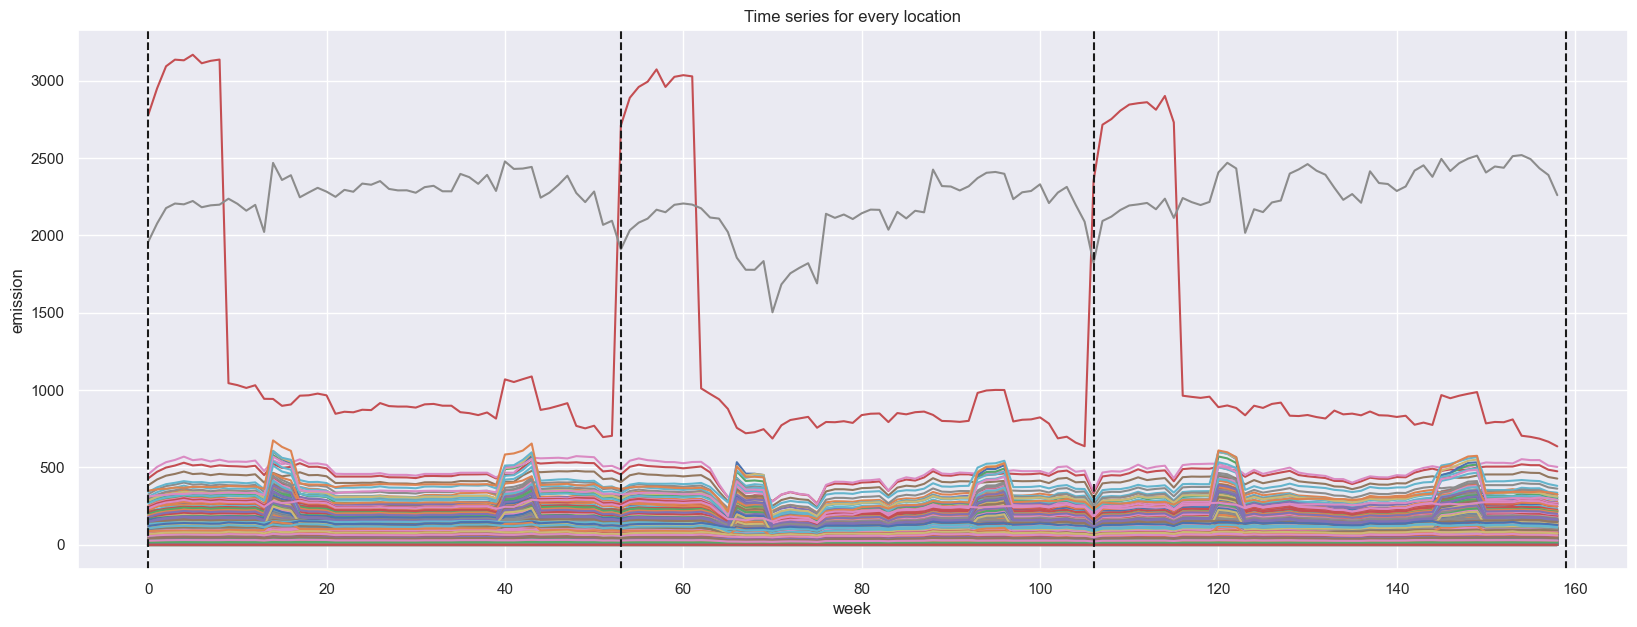

In [76]:
for ll in train[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = train[(train.latitude == ll[1].latitude) & (train.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 159]:
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.show()

Except for two locations, the emission patterns look very similar

## Brief explaination of each the most correlated features
'Cloud_surface_albedo' - zdolność powierzchni do odbijania promieni światła  
'CarbonMonoxide_H2O_column_number_density' - Water vapor column. mol/m^2  
'CarbonMonoxide_CO_column_number_density' - Vertically integrated CO column density. mol/m^2  
'UvAerosolIndex_solar_azimuth_angle' 
'Ozone_solar_azimuth_angle'  
'Cloud_solar_azimuth_angle' 
'CarbonMonoxide_solar_azimuth_angle'  
'Cloud_solar_zenith_angle'  
'Ozone_solar_zenith_angle'  
'UvAerosolIndex_solar_zenith_angle'  
'CarbonMonoxide_solar_zenith_angle'  
'Cloud_sensor_zenith_angle'  
'Ozone_O3_column_number_density_amf' - Weighted mean of cloudy and clear air mass factor (amf) weighted by intensity-weighted cloud fraction.  
'Cloud_cloud_top_pressure' - Retrieved atmospheric pressure at the level of cloud top  
'Cloud_cloud_base_pressure' - Cloud base pressure  
'Ozone_O3_column_number_density' - Total atmospheric column of O3 between the surface and the top of atmosphere, calculated with the DOAS algorithm.  
  
solar_azimuth_angle - Azimuth angle of the Sun at the ground pixel location (WGS84); angle measured East-of-North.  
solar_zenith_angle - Zenith angle of the Sun at the ground pixel location (WGS84); angle measured away from the vertical.  

# Filling missing values

In [77]:
train['emission'].median()

45.593445

In [78]:
# train = train.drop('log_emission', axis=1)
cont_cols=[f for f in train.columns if train[f].dtype!="O" and f not in ['emission'] and train[f].nunique()/train[f].shape[0]*100>25]
print(len(cont_cols)) # 71

71


In [79]:
train[train.select_dtypes(['bool', 'object']).columns]

ID_LAT_LON_YEAR_WEEK  country  is_covid  is_lockdown  \
0      ID_-0.510_29.290_2019_00    Congo     False        False   
1      ID_-0.510_29.290_2019_01    Congo     False        False   
2      ID_-0.510_29.290_2019_02    Congo     False        False   
3      ID_-0.510_29.290_2019_03    Congo     False        False   
4      ID_-0.510_29.290_2019_04    Congo     False        False   
...                         ...      ...       ...          ...   
79018  ID_-3.299_30.301_2021_48  Burundi     False        False   
79019  ID_-3.299_30.301_2021_49  Burundi     False        False   
79020  ID_-3.299_30.301_2021_50  Burundi     False        False   
79021  ID_-3.299_30.301_2021_51  Burundi     False        False   
79022  ID_-3.299_30.301_2021_52  Burundi      True        False   

       is_covid_peak  is_covid_dis_peak  public_holidays  
0              False              False             True  
1              False              False            False  
2              False              False            False  
3              False              False            False  
4              False              False            False  
...              ...                ...              ...  
79018          False              False            False  
79019          False              False            False  
79020          False              False            False  
79021          False              False             True  
79022          False              False            False  

[79023 rows x 7 columns]

We can expect that the test data will have mostly False due to the fact that covid is over.

In [80]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_train = OrdinalEncoder()
ordinal_test = OrdinalEncoder()

train_cpy = train.copy()
test_cpy = test.copy()

train_names = train_cpy.select_dtypes(['bool', 'object']).columns
test_names = test.select_dtypes(['bool', 'object']).columns
ecoded_train = pd.DataFrame(ordinal_train.fit_transform(train_cpy[list(train_cpy.select_dtypes(['bool', 'object']).columns)]), columns=train_names)
ecoded_test = pd.DataFrame(ordinal_test.fit_transform(test_cpy[list(test_cpy.select_dtypes(['bool', 'object']).columns)]), columns=test_names)

train_encoded = pd.concat([train_cpy[train_cpy.select_dtypes('number').columns], ecoded_train], axis=1)
test_encoded = pd.concat([test_cpy[test_cpy.select_dtypes('number').columns], ecoded_test], axis=1)
train_encoded, test_encoded

print(train_encoded.shape, train.shape, test_encoded.shape, test.shape)
# train_names = train_cpy.select_dtypes(['bool', 'object']).columns
# test_names = test.select_dtypes(['bool', 'object']).columns
# train[list(train.select_dtypes(['bool', 'object']).columns)] = pd.DataFrame(ordinal.fit_transform(train[list(train.select_dtypes(['bool', 'object']).columns)]), columns=train_names)
# train_ord = pd.DataFrame(train, ordinal.get_feature_names_out())
# test[list(test.select_dtypes(['bool', 'object']).columns)] = pd.DataFrame(ordinal.fit_transform(test[list(test.select_dtypes(['bool', 'object']).columns)]), columns=test_names)
# test_ord = pd.DataFrame(test, columns=ordinal.get_feature_names_out())
ordinal_train.categories_, ordinal_test.categories_

(79023, 106) (79023, 106) (24353, 105) (24353, 105)


([array(['ID_-0.510_29.290_2019_00', 'ID_-0.510_29.290_2019_01',
         'ID_-0.510_29.290_2019_02', ..., 'ID_-3.299_30.301_2021_50',
         'ID_-3.299_30.301_2021_51', 'ID_-3.299_30.301_2021_52'],
        dtype=object),
  array(['Burundi', 'Congo', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object),
  array([False,  True]),
  array([False,  True]),
  array([False,  True]),
  array([False,  True]),
  array([False,  True])],
 [array(['ID_-0.510_29.290_2022_00', 'ID_-0.510_29.290_2022_01',
         'ID_-0.510_29.290_2022_02', ..., 'ID_-3.299_30.301_2022_46',
         'ID_-3.299_30.301_2022_47', 'ID_-3.299_30.301_2022_48'],
        dtype=object),
  array(['Burundi', 'Congo', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object),
  array([False]),
  array([False]),
  array([False]),
  array([False]),
  array([False,  True])])

In [81]:
train = train_encoded
test = test_encoded
# train['emission']

In [82]:
test['latitude'].isna().value_counts()

latitude
False    24353
Name: count, dtype: int64

Now it is time for slightly changing the data through augmentation and applying some transformations like log, or Yeo-Johnson.

In [83]:
from prettytable import PrettyTable
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor, LinearRegression
from scipy.spatial.distance import cdist, correlation

minmax_scaler = MinMaxScaler()
table = PrettyTable()
unimportant_features=[]
overall_best_score=200 # initially
overall_best_col='none'
table.field_names = ['Feature', 'Original RMSE', 'Transformation', 'Tranformed RMSE', 'Best Correlated']

train_names = train.columns
test_names = test.columns

def min_max_scaler(train, test, column):
    max_val=max(train[column].max(),test[column].max())
    min_val=min(train[column].min(),test[column].min())

    train[column]=(train[column]-min_val)/(max_val-min_val)
    test[column]=(test[column]-min_val)/(max_val-min_val)
    return train,test

for col in cont_cols:
     train, test=min_max_scaler(train, test, col)

# train = pd.DataFrame(minmax_scaler.fit_transform(train), columns=train_names)
# test = pd.DataFrame(minmax_scaler.fit_transform(test), columns=test_names)

# print(cont_cols)

for i, col in enumerate(cont_cols):
    # Log Transformation after MinMax Scaling(keeps data between 0 and 1)
    train["log_"+col]=np.log1p(train[col])
    test["log_"+col]=np.log1p(test[[col]])
    
    # Square Root Transformation
    train["sqrt_"+col]=np.sqrt(train[[col]])
    test["sqrt_"+col]=np.sqrt(test[[col]])
    
    # Box-Cox transformation
    combined_data = pd.concat([train[[col]], test[[col]]], axis=0)
    transformer = PowerTransformer(method='box-cox')
    # Apply scaling and transformation on the combined data
    scaled_data = minmax_scaler.fit_transform(combined_data)+1
    transformed_data = transformer.fit_transform(scaled_data)

    # Assign the transformed values back to train and test data
    train["bx_cx_" + col] = transformed_data[:train.shape[0]]
    test["bx_cx_" + col] = transformed_data[train.shape[0]:]
    
    # Yeo-Johnson transformation
    transformer = PowerTransformer(method='yeo-johnson')
    train["y_J_"+col] = transformer.fit_transform(train[[col]])
    test["y_J_"+col] = transformer.transform(test[[col]])
    
    # Log sqrt transformation
    train["log_sqrt"+col]=np.log1p(train["sqrt_"+col])
    test["log_sqrt"+col]=np.log1p(test["sqrt_"+col])
    
    temp_cols=[col,"log_"+col,"sqrt_"+col, "bx_cx_"+col,"y_J_"+col ,"log_sqrt"+col] # columns in both train and test set
    
    model=LinearRegression()
    
    # See which transformation along with the original is giving you the best univariate fit with target
    # And distance correlation with emission would be the highest
    MAE = []
    DC = []
    
    to_corr = temp_cols.copy()
    to_corr.append('emission')
    # print(to_corr)
    
    dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]
    highest_dcorr = dist_corr_emission.drop('emission').idxmax()
    highest_dcorr_val = dist_corr_emission.drop('emission').max()
    # print(highest_dcorr)
    
    for f in temp_cols:
        X=train[[f]].values
        y=train["emission"].values
        
        model.fit(X, y)
        score = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error")
        # custom_score = dist_corr_emission[f] * score.mean()
        
        # print(score)
        
        MAE.append((f,abs(score.mean())))
        if overall_best_score > abs(score.mean()):
            overall_best_score = abs(score.mean())
            overall_best_col = f
        if f==col:
            orig_mae=abs(score.mean()) 
            
        # MAE.append((f,abs(custom_score)))
        # if overall_best_score > abs(custom_score):
        #     overall_best_score = abs(custom_score)
        #     overall_best_col = f
        # if f==col:
        #     orig_mae=abs(custom_score) 
            
    best_col, best_acc=sorted(MAE, key=lambda x:x[1], reverse=False)[0]
    
    cols_to_drop = [f for f in temp_cols if  f!= best_col and f not in col]
    # print(cols_to_drop)
    final_selection=[f for f in temp_cols if f not in cols_to_drop]
    
    if cols_to_drop:
        unimportant_features=unimportant_features+cols_to_drop
    
    train=train.drop(columns=cols_to_drop)
    test=test.drop(columns=cols_to_drop)

    table.add_row([col, orig_mae, best_col, best_acc, highest_dcorr])
    
    print(f'{col,orig_mae,best_col ,best_acc, highest_dcorr}{highest_dcorr_val:.3f} - {(i+1)/len(cont_cols)*100:.2f}%')

print(table)  
print("overall best CV RMSE score: ", overall_best_score)

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('SulphurDioxide_SO2_column_number_density', 131.76218107683206, 'y_J_SulphurDioxide_SO2_column_number_density', 131.75419071530524, 'log_SulphurDioxide_SO2_column_number_density')0.017 - 1.41%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('SulphurDioxide_SO2_column_number_density_amf', 131.76942013865272, 'bx_cx_SulphurDioxide_SO2_column_number_density_amf', 131.76906008425394, 'SulphurDioxide_SO2_column_number_density_amf')0.006 - 2.82%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('SulphurDioxide_SO2_slant_column_number_density', 131.7579299027795, 'y_J_SulphurDioxide_SO2_slant_column_number_density', 131.74875837694552, 'log_SulphurDioxide_SO2_slant_column_number_density')0.021 - 4.23%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('SulphurDioxide_cloud_fraction', 131.74260823958252, 'log_sqrtSulphurDioxide_cloud_fraction', 131.74032059572548, 'log_sqrtSulphurDioxide_cloud_fraction')0.002 - 5.63%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('SulphurDioxide_sensor_azimuth_angle', 131.73492221967982, 'log_sqrtSulphurDioxide_sensor_azimuth_angle', 131.73166415585993, 'log_sqrtSulphurDioxide_sensor_azimuth_angle')0.024 - 7.04%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('SulphurDioxide_sensor_zenith_angle', 131.72574385074336, 'SulphurDioxide_sensor_zenith_angle', 131.72574385074336, 'log_sqrtSulphurDioxide_sensor_zenith_angle')0.008 - 8.45%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('SulphurDioxide_solar_azimuth_angle', 131.67820415394598, 'SulphurDioxide_solar_azimuth_angle', 131.67820415394598, 'SulphurDioxide_solar_azimuth_angle')0.026 - 9.86%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('SulphurDioxide_solar_zenith_angle', 131.74644065105812, 'log_sqrtSulphurDioxide_solar_zenith_angle', 131.74590603102519, 'SulphurDioxide_solar_zenith_angle')0.001 - 11.27%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('SulphurDioxide_SO2_column_number_density_15km', 131.75666881950536, 'bx_cx_SulphurDioxide_SO2_column_number_density_15km', 131.74911686486934, 'y_J_SulphurDioxide_SO2_column_number_density_15km')0.021 - 12.68%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('CarbonMonoxide_CO_column_number_density', 131.59089624425548, 'CarbonMonoxide_CO_column_number_density', 131.59089624425548, 'CarbonMonoxide_CO_column_number_density')0.041 - 14.08%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('CarbonMonoxide_H2O_column_number_density', 131.74910973624554, 'CarbonMonoxide_H2O_column_number_density', 131.74910973624554, 'CarbonMonoxide_H2O_column_number_density')0.044 - 15.49%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('CarbonMonoxide_cloud_height', 131.85942481073266, 'bx_cx_CarbonMonoxide_cloud_height', 131.85620923512116, 'bx_cx_CarbonMonoxide_cloud_height')0.013 - 16.90%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('CarbonMonoxide_sensor_altitude', 134.40691866893656, 'log_sqrtCarbonMonoxide_sensor_altitude', 134.0626192400519, 'y_J_CarbonMonoxide_sensor_altitude')0.003 - 18.31%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('CarbonMonoxide_sensor_azimuth_angle', 131.72666587570623, 'bx_cx_CarbonMonoxide_sensor_azimuth_angle', 131.7263397471388, 'bx_cx_CarbonMonoxide_sensor_azimuth_angle')0.002 - 19.72%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('CarbonMonoxide_sensor_zenith_angle', 131.7292709456595, 'y_J_CarbonMonoxide_sensor_zenith_angle', 131.7292472951485, 'log_sqrtCarbonMonoxide_sensor_zenith_angle')0.002 - 21.13%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('CarbonMonoxide_solar_azimuth_angle', 131.68335372557615, 'bx_cx_CarbonMonoxide_solar_azimuth_angle', 131.68319419034245, 'bx_cx_CarbonMonoxide_solar_azimuth_angle')0.025 - 22.54%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('CarbonMonoxide_solar_zenith_angle', 131.71262315894796, 'y_J_CarbonMonoxide_solar_zenith_angle', 131.71081889610053, 'y_J_CarbonMonoxide_solar_zenith_angle')0.020 - 23.94%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_NO2_column_number_density', 131.73502602081095, 'NitrogenDioxide_NO2_column_number_density', 131.73502602081095, 'NitrogenDioxide_NO2_column_number_density')0.003 - 25.35%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_tropospheric_NO2_column_number_density', 131.75997429265257, 'NitrogenDioxide_tropospheric_NO2_column_number_density', 131.75997429265257, 'y_J_NitrogenDioxide_tropospheric_NO2_column_number_density')0.011 - 26.76%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_stratospheric_NO2_column_number_density', 131.7579173405723, 'NitrogenDioxide_stratospheric_NO2_column_number_density', 131.7579173405723, 'log_sqrtNitrogenDioxide_stratospheric_NO2_column_number_density')0.019 - 28.17%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_NO2_slant_column_number_density', 131.70411131114184, 'NitrogenDioxide_NO2_slant_column_number_density', 131.70411131114184, 'log_NitrogenDioxide_NO2_slant_column_number_density')0.015 - 29.58%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_tropopause_pressure', 131.7307170739564, 'log_sqrtNitrogenDioxide_tropopause_pressure', 131.7299867650556, 'NitrogenDioxide_tropopause_pressure')0.002 - 30.99%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_absorbing_aerosol_index', 131.699378391071, 'log_sqrtNitrogenDioxide_absorbing_aerosol_index', 131.693909721865, 'log_sqrtNitrogenDioxide_absorbing_aerosol_index')0.021 - 32.39%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_cloud_fraction', 131.6953980306168, 'bx_cx_NitrogenDioxide_cloud_fraction', 131.69155663039064, 'y_J_NitrogenDioxide_cloud_fraction')0.017 - 33.80%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_sensor_altitude', 134.16275454009605, 'log_sqrtNitrogenDioxide_sensor_altitude', 133.62940748145894, 'log_sqrtNitrogenDioxide_sensor_altitude')0.024 - 35.21%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_sensor_azimuth_angle', 131.75344438849325, 'log_sqrtNitrogenDioxide_sensor_azimuth_angle', 131.74953064618043, 'log_sqrtNitrogenDioxide_sensor_azimuth_angle')0.027 - 36.62%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_sensor_zenith_angle', 131.7194301652541, 'log_sqrtNitrogenDioxide_sensor_zenith_angle', 131.71859308167097, 'NitrogenDioxide_sensor_zenith_angle')0.009 - 38.03%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_solar_azimuth_angle', 131.67645944665486, 'NitrogenDioxide_solar_azimuth_angle', 131.67645944665486, 'NitrogenDioxide_solar_azimuth_angle')0.027 - 39.44%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('NitrogenDioxide_solar_zenith_angle', 131.75803005730623, 'log_sqrtNitrogenDioxide_solar_zenith_angle', 131.75348676029722, 'y_J_NitrogenDioxide_solar_zenith_angle')0.004 - 40.85%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('Formaldehyde_tropospheric_HCHO_column_number_density', 131.68003419524578, 'Formaldehyde_tropospheric_HCHO_column_number_density', 131.68003419524578, 'Formaldehyde_tropospheric_HCHO_column_number_density')0.032 - 42.25%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('Formaldehyde_tropospheric_HCHO_column_number_density_amf', 131.70162413413908, 'Formaldehyde_tropospheric_HCHO_column_number_density_amf', 131.70162413413908, 'bx_cx_Formaldehyde_tropospheric_HCHO_column_number_density_amf')0.037 - 43.66%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr).applymap(lambda x: abs(x-1)).iloc[-1]


('Formaldehyde_HCHO_slant_column_number_density', 131.6986389132363, 'bx_cx_Formaldehyde_HCHO_slant_column_number_density', 131.6981557780544, 'bx_cx_Formaldehyde_HCHO_slant_column_number_density')0.023 - 45.07%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_sqrt"+col]=np.log1p(train["sqrt_"+col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_sqrt"+col]=np.log1p(test["sqrt_"+col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T,

('Formaldehyde_cloud_fraction', 131.74245964194043, 'log_sqrtFormaldehyde_cloud_fraction', 131.7395977250697, 'log_sqrtFormaldehyde_cloud_fraction')0.004 - 46.48%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["y_J_"+col] = transformer.fit_transform(train[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["y_J_"+col] = transformer.transform(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

('Formaldehyde_solar_zenith_angle', 131.74284339827906, 'log_Formaldehyde_solar_zenith_angle', 131.7425058326082, 'Formaldehyde_solar_zenith_angle')0.003 - 47.89%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["bx_cx_" + col] = transformed_data[:train.shape[0]]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["bx_cx_" + col] = transformed_data[train.shape[0]:]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

('Formaldehyde_solar_azimuth_angle', 131.68015987198976, 'bx_cx_Formaldehyde_solar_azimuth_angle', 131.68012930821556, 'bx_cx_Formaldehyde_solar_azimuth_angle')0.026 - 49.30%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["sqrt_"+col]=np.sqrt(train[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["sqrt_"+col]=np.sqrt(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joini

('Formaldehyde_sensor_zenith_angle', 131.72737354889827, 'log_sqrtFormaldehyde_sensor_zenith_angle', 131.72596365895353, 'y_J_Formaldehyde_sensor_zenith_angle')0.008 - 50.70%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Formaldehyde_sensor_azimuth_angle', 131.73808403111065, 'log_sqrtFormaldehyde_sensor_azimuth_angle', 131.732587157048, 'log_sqrtFormaldehyde_sensor_azimuth_angle')0.022 - 52.11%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolIndex_absorbing_aerosol_index', 131.7312895208267, 'log_sqrtUvAerosolIndex_absorbing_aerosol_index', 131.72352943112497, 'log_sqrtUvAerosolIndex_absorbing_aerosol_index')0.009 - 53.52%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolIndex_sensor_altitude', 137.0537080965288, 'log_sqrtUvAerosolIndex_sensor_altitude', 136.66310820397553, 'UvAerosolIndex_sensor_altitude')0.004 - 54.93%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolIndex_sensor_azimuth_angle', 131.7230758958615, 'log_sqrtUvAerosolIndex_sensor_azimuth_angle', 131.720965251057, 'log_sqrtUvAerosolIndex_sensor_azimuth_angle')0.009 - 56.34%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolIndex_sensor_zenith_angle', 131.72911096984336, 'log_sqrtUvAerosolIndex_sensor_zenith_angle', 131.72836787921807, 'bx_cx_UvAerosolIndex_sensor_zenith_angle')0.010 - 57.75%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolIndex_solar_azimuth_angle', 131.6807295650302, 'UvAerosolIndex_solar_azimuth_angle', 131.6807295650302, 'UvAerosolIndex_solar_azimuth_angle')0.025 - 59.15%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolIndex_solar_zenith_angle', 131.69346521109418, 'y_J_UvAerosolIndex_solar_zenith_angle', 131.6883097150911, 'y_J_UvAerosolIndex_solar_zenith_angle')0.023 - 60.56%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Ozone_O3_column_number_density', 131.73837744415005, 'log_sqrtOzone_O3_column_number_density', 131.7376708590502, 'y_J_Ozone_O3_column_number_density')0.016 - 61.97%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Ozone_O3_column_number_density_amf', 131.73258429210472, 'Ozone_O3_column_number_density_amf', 131.73258429210472, 'sqrt_Ozone_O3_column_number_density_amf')0.014 - 63.38%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Ozone_O3_slant_column_number_density', 131.74148992092915, 'log_sqrtOzone_O3_slant_column_number_density', 131.73958450122277, 'log_sqrtOzone_O3_slant_column_number_density')0.007 - 64.79%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Ozone_O3_effective_temperature', 131.71520487800493, 'y_J_Ozone_O3_effective_temperature', 131.70982010933943, 'y_J_Ozone_O3_effective_temperature')0.010 - 66.20%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Ozone_cloud_fraction', 131.7470986102811, 'log_sqrtOzone_cloud_fraction', 131.72722890546981, 'log_sqrtOzone_cloud_fraction')0.006 - 67.61%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Ozone_sensor_azimuth_angle', 131.72295442089285, 'log_sqrtOzone_sensor_azimuth_angle', 131.7214331775561, 'log_sqrtOzone_sensor_azimuth_angle')0.008 - 69.01%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Ozone_sensor_zenith_angle', 131.7297745693056, 'log_sqrtOzone_sensor_zenith_angle', 131.72881443547266, 'bx_cx_Ozone_sensor_zenith_angle')0.006 - 70.42%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Ozone_solar_azimuth_angle', 131.6806638342193, 'Ozone_solar_azimuth_angle', 131.6806638342193, 'Ozone_solar_azimuth_angle')0.025 - 71.83%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Ozone_solar_zenith_angle', 131.69093271533296, 'y_J_Ozone_solar_zenith_angle', 131.68608646996017, 'y_J_Ozone_solar_zenith_angle')0.024 - 73.24%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolLayerHeight_aerosol_height', 131.83556861401433, 'log_sqrtUvAerosolLayerHeight_aerosol_height', 131.82351231685112, 'bx_cx_UvAerosolLayerHeight_aerosol_height')0.033 - 74.65%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolLayerHeight_aerosol_pressure', 131.86204701977647, 'bx_cx_UvAerosolLayerHeight_aerosol_pressure', 131.8615550170851, 'bx_cx_UvAerosolLayerHeight_aerosol_pressure')0.035 - 76.06%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolLayerHeight_aerosol_optical_depth', 131.29923190877176, 'y_J_UvAerosolLayerHeight_aerosol_optical_depth', 131.27321278253785, 'UvAerosolLayerHeight_aerosol_optical_depth')0.110 - 77.46%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolLayerHeight_sensor_zenith_angle', 131.75061012074838, 'bx_cx_UvAerosolLayerHeight_sensor_zenith_angle', 131.74764472052115, 'bx_cx_UvAerosolLayerHeight_sensor_zenith_angle')0.004 - 78.87%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolLayerHeight_sensor_azimuth_angle', 131.766028915742, 'log_sqrtUvAerosolLayerHeight_sensor_azimuth_angle', 131.75791257047243, 'y_J_UvAerosolLayerHeight_sensor_azimuth_angle')0.016 - 80.28%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolLayerHeight_solar_azimuth_angle', 131.6892142179702, 'UvAerosolLayerHeight_solar_azimuth_angle', 131.6892142179702, 'UvAerosolLayerHeight_solar_azimuth_angle')0.021 - 81.69%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('UvAerosolLayerHeight_solar_zenith_angle', 131.7509914049569, 'log_sqrtUvAerosolLayerHeight_solar_zenith_angle', 131.74638839356817, 'log_sqrtUvAerosolLayerHeight_solar_zenith_angle')0.019 - 83.10%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Cloud_cloud_fraction', 131.7416385009863, 'log_sqrtCloud_cloud_fraction', 131.73019238916882, 'log_sqrtCloud_cloud_fraction')0.006 - 84.51%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Cloud_cloud_top_pressure', 131.8114130204312, 'Cloud_cloud_top_pressure', 131.8114130204312, 'Cloud_cloud_top_pressure')0.014 - 85.92%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Cloud_cloud_top_height', 131.8812755007183, 'log_sqrtCloud_cloud_top_height', 131.84816448400016, 'log_sqrtCloud_cloud_top_height')0.010 - 87.32%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Cloud_cloud_base_pressure', 131.82029974714027, 'y_J_Cloud_cloud_base_pressure', 131.81982642285894, 'y_J_Cloud_cloud_base_pressure')0.013 - 88.73%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Cloud_cloud_base_height', 131.88589455891014, 'log_sqrtCloud_cloud_base_height', 131.85042009091856, 'log_sqrtCloud_cloud_base_height')0.009 - 90.14%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Cloud_cloud_optical_depth', 131.73655090209178, 'bx_cx_Cloud_cloud_optical_depth', 131.71535041807653, 'bx_cx_Cloud_cloud_optical_depth')0.011 - 91.55%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Cloud_surface_albedo', 131.86673732184653, 'log_sqrtCloud_surface_albedo', 131.8329637359532, 'log_sqrtCloud_surface_albedo')0.053 - 92.96%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Cloud_sensor_azimuth_angle', 131.7328829435751, 'log_sqrtCloud_sensor_azimuth_angle', 131.72857875250818, 'log_sqrtCloud_sensor_azimuth_angle')0.008 - 94.37%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Cloud_sensor_zenith_angle', 131.7153958543724, 'bx_cx_Cloud_sensor_zenith_angle', 131.7143234155148, 'bx_cx_Cloud_sensor_zenith_angle')0.016 - 95.77%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Cloud_solar_azimuth_angle', 131.6819770187933, 'Cloud_solar_azimuth_angle', 131.6819770187933, 'Cloud_solar_azimuth_angle')0.024 - 97.18%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Cloud_solar_zenith_angle', 131.69715894030938, 'y_J_Cloud_solar_zenith_angle', 131.69236563233733, 'y_J_Cloud_solar_zenith_angle')0.023 - 98.59%


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["log_"+col]=np.log1p(train[col])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["log_"+col]=np.log1p(test[[col]])
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\235313762.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

('Ozone_solar_azimuth_angle_lag_1', 131.6665009766976, 'Ozone_solar_azimuth_angle_lag_1', 131.6665009766976, 'Ozone_solar_azimuth_angle_lag_1')0.028 - 100.00%
+----------------------------------------------------------+--------------------+----------------------------------------------------------+--------------------+-----------------------------------------------------------------+
|                         Feature                          |   Original RMSE    |                      Transformation                      |  Tranformed RMSE   |                         Best Correlated                         |
+----------------------------------------------------------+--------------------+----------------------------------------------------------+--------------------+-----------------------------------------------------------------+
|         SulphurDioxide_SO2_column_number_density         | 131.76218107683206 |       y_J_SulphurDioxide_SO2_column_number_density       | 131.754190715305

In [84]:
train.shape, test.shape

((79023, 159), (24353, 158))

In [85]:
exist_cols = [f for f in train.columns if f not in ['emission', 'ID_LAT_LON_YEAR_WEEK']]
top_features = {}

to_corr = exist_cols.copy()
to_corr.append('emission')
# print(to_corr)

dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr, index=to_corr).applymap(lambda x: abs(x-1))
highest_dcorr = dist_corr_emission.iloc[-1].drop('emission').idxmax()
highest_dcorr_val = dist_corr_emission.iloc[-1].drop('emission').max()
print(f'{highest_dcorr} {highest_dcorr_val}')

for f in exist_cols:
    X = train[[f]].values
    y = np.log1p(train["emission"].values)

    
    
    best_rmse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
    
    avg_rmse = np.mean(best_rmse)
    top_features[f] = avg_rmse

# Sort the features based on log loss in ascending order
sorted_top_features = sorted(top_features.items(), key=lambda x: x[1])

# Get the top 100 features with the least log loss
top_50_features_full = [feature for feature, _ in sorted_top_features[:50]]
print("Top 50 features with the least RMSE:")
print(top_50_features_full)

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\1929618066.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(train[to_corr].T, train[to_corr].T, metric='correlation'), columns=to_corr, index=to_corr).applymap(lambda x: abs(x-1))


dist_rwanda 0.2400116863009838
Top 50 features with the least RMSE:
['latitude', 'id', 'cluster_1', 'dist_kirumba', 'cluster_0', 'cluster_8', 'rot_30_y', 'UvAerosolIndex_sensor_altitude', 'log_sqrtUvAerosolIndex_sensor_altitude', 'dist_muy', 'cluster_10', 'cluster_6', 'dist_massif', 'CarbonMonoxide_sensor_altitude', 'cluster_7', 'log_sqrtCarbonMonoxide_sensor_altitude', 'NitrogenDioxide_sensor_altitude', 'log_sqrtNitrogenDioxide_sensor_altitude', 'dist_mbarara', 'Cloud_cloud_top_pressure', 'log_sqrtOzone_cloud_fraction', 'log_sqrtCloud_cloud_top_height', 'Ozone_cloud_fraction', 'Cloud_cloud_top_height', 'y_J_Cloud_cloud_base_pressure', 'Cloud_cloud_base_pressure', 'bx_cx_Cloud_cloud_optical_depth', 'log_sqrtCloud_cloud_base_height', 'log_sqrtUvAerosolIndex_absorbing_aerosol_index', 'UvAerosolIndex_absorbing_aerosol_index', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'Formaldehyde_cloud_fraction', 'SulphurDioxide_cloud_fraction', 'log_sqrtCloud_cloud_fraction', 'Cloud_clou

In [86]:
corr_top50_full = list(dist_corr_emission['emission'].sort_values(ascending=False).head(25).index)
len(corr_top50_full)

25

In [87]:
top_correlation_full = pd.DataFrame(cdist(train[corr_top50_full].T, train[corr_top50_full].T, metric='correlation'), columns=corr_top50_full, index=corr_top50_full).applymap(lambda x: abs(x-1))

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\941531767.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_correlation_full = pd.DataFrame(cdist(train[corr_top50_full].T, train[corr_top50_full].T, metric='correlation'), columns=corr_top50_full, index=corr_top50_full).applymap(lambda x: abs(x-1))


Checking the distance correlation now

Text(0.5, 1.0, 'Distance Correlation')

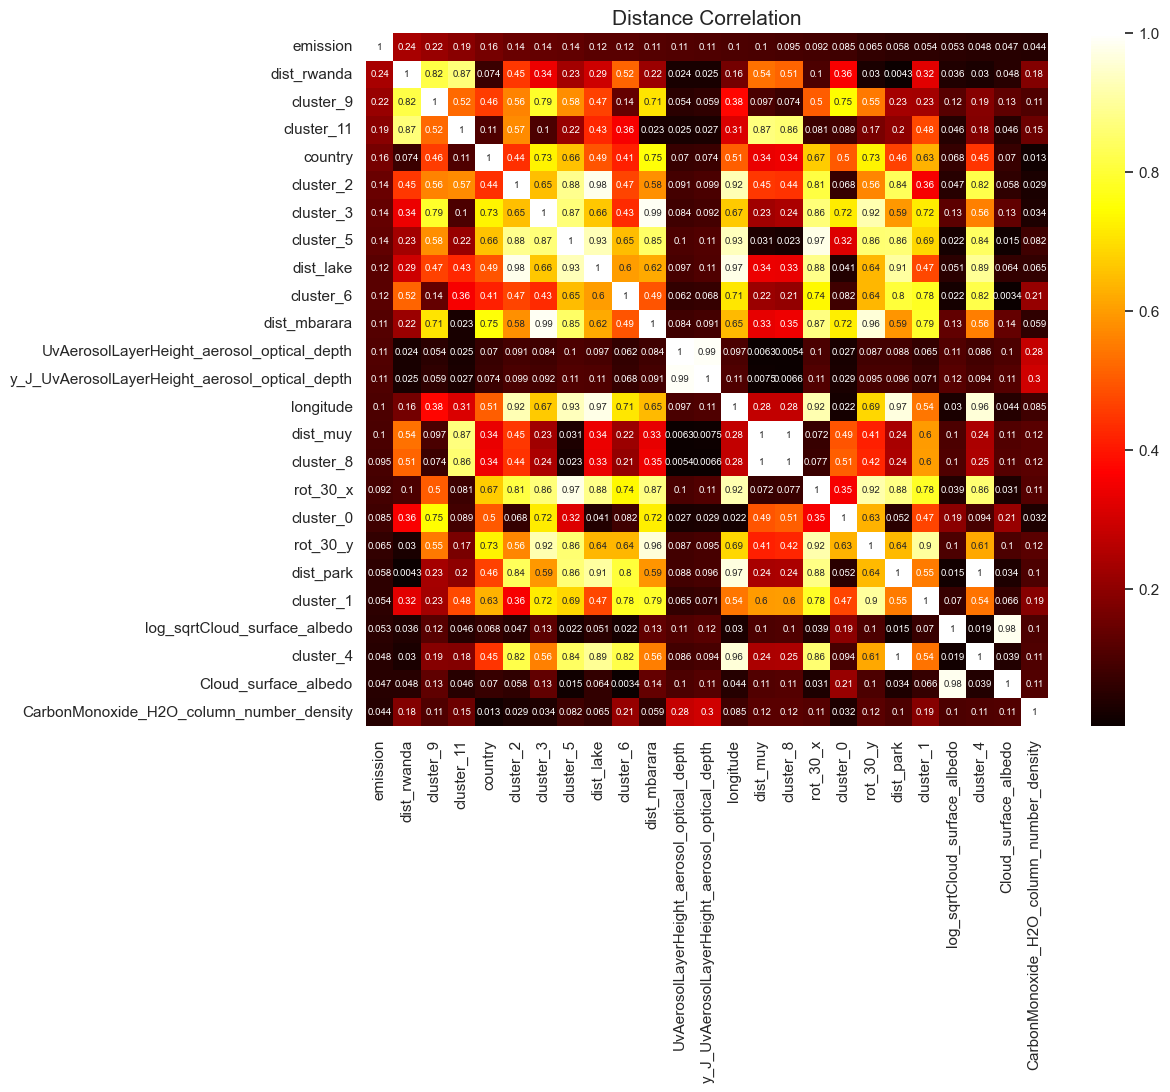

In [88]:
plt.figure(figsize=(11,9))
sns.heatmap(top_correlation_full, annot = True, cmap='hot', annot_kws={"fontsize":7})
plt.title('Distance Correlation', fontsize=15)

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\3962245956.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(train, x='dist_rwanda', y='emission', orient='v', join=False, errorbar=None)


<AxesSubplot: xlabel='dist_rwanda', ylabel='emission'>

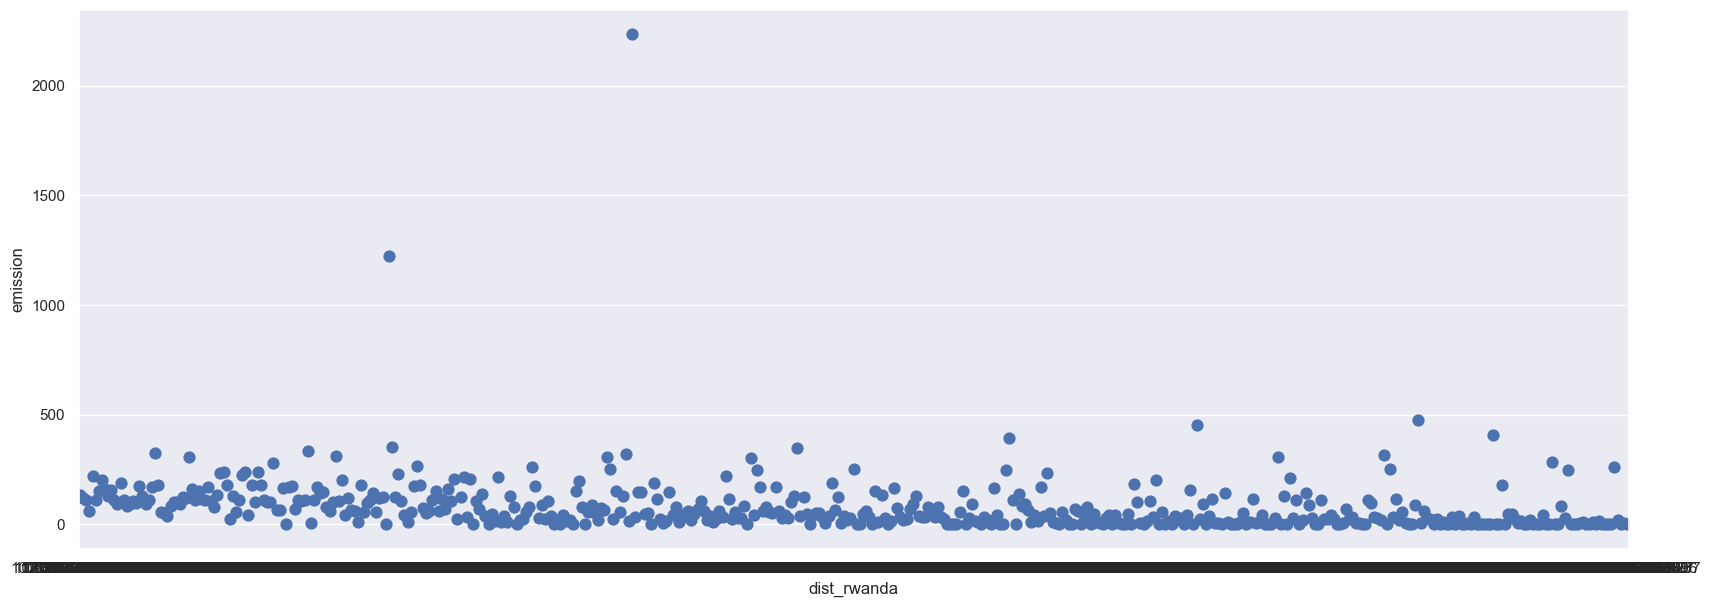

In [89]:
sns.pointplot(train, x='dist_rwanda', y='emission', orient='v', join=False, errorbar=None)

In [90]:
seasonal = pd.read_csv('seasonal_points.csv')
seasonal.drop('Unnamed: 0', axis=1, inplace=True)
len(seasonal)

239

In [91]:
zeros = pd.read_csv('zero_points.csv')
zeros.drop('Unnamed: 0', axis=1, inplace=True)
len(zeros)

15

In [92]:
test_labels = pd.read_csv(os.path.join(path, "test.csv"))
test_labels = test_labels[['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude']]

In [93]:
result_train = train.merge(seasonal, on=['latitude', 'longitude'], how='left', indicator=True)
filtered_train = result_train[result_train['_merge'] == 'left_only']
filtered_train.drop('_merge', axis=1, inplace=True)
result_train = filtered_train.merge(zeros, on=['latitude', 'longitude'], how='left', indicator=True)
filtered_train = result_train[result_train['_merge'] == 'left_only']
filtered_train.drop('_merge', axis=1, inplace=True)
filtered_train[['latitude','longitude']].value_counts().count()

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2132529032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train.drop('_merge', axis=1, inplace=True)
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2132529032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train.drop('_merge', axis=1, inplace=True)


243

In [94]:
result_test_labels = test_labels.merge(seasonal, on=['latitude', 'longitude'], how='left', indicator=True)
filtered_test_labels = result_test_labels[result_test_labels['_merge'] == 'left_only']
filtered_test_labels.drop('_merge', axis=1, inplace=True)
result_test_labels = filtered_test_labels.merge(zeros, on=['latitude', 'longitude'], how='left', indicator=True)
filtered_test_labels = result_test_labels[result_test_labels['_merge'] == 'left_only']
filtered_test_labels.drop('_merge', axis=1, inplace=True)

filtered_test_labels[['latitude','longitude']].value_counts().count()

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\1505437425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_labels.drop('_merge', axis=1, inplace=True)
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\1505437425.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_labels.drop('_merge', axis=1, inplace=True)


243

In [95]:
result_test = test.merge(seasonal, on=['latitude', 'longitude'], how='left', indicator=True)
filtered_test = result_test[result_test['_merge'] == 'left_only']
filtered_test.drop('_merge', axis=1, inplace=True)
result_test = filtered_test.merge(zeros, on=['latitude', 'longitude'], how='left', indicator=True)
filtered_test = result_test[result_test['_merge'] == 'left_only']
filtered_test.drop('_merge', axis=1, inplace=True)
filtered_test[['latitude','longitude']].value_counts().count()

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\1842313906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test.drop('_merge', axis=1, inplace=True)
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\1842313906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test.drop('_merge', axis=1, inplace=True)


243

In [96]:
filtered_train.shape, filtered_test.shape

((38637, 159), (11907, 158))

In [97]:
243+239+15 == 497

True

In [98]:
exist_cols = [f for f in filtered_train.columns if f not in ['emission', 'ID_LAT_LON_YEAR_WEEK']]
top_features = {}

to_corr = exist_cols.copy()
to_corr.append('emission')
# print(to_corr)

dist_corr_emission = pd.DataFrame(cdist(filtered_train[to_corr].T, filtered_train[to_corr].T, metric='correlation'), columns=to_corr, index=to_corr).applymap(lambda x: abs(x-1))
highest_dcorr = dist_corr_emission.iloc[-1].drop('emission').idxmax()
highest_dcorr_val = dist_corr_emission.iloc[-1].drop('emission').max()
print(f'{highest_dcorr} {highest_dcorr_val}')

for f in exist_cols:
    X = filtered_train[[f]].values
    y = np.log1p(filtered_train["emission"].values)

    
    
    best_rmse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
    
    avg_rmse = np.mean(best_rmse)
    top_features[f] = avg_rmse

# Sort the features based on log loss in ascending order
sorted_top_features = sorted(top_features.items(), key=lambda x: x[1])

# Get the top 100 features with the least log loss
top_50_features = [feature for feature, _ in sorted_top_features[:50]]
print("Top 50 features with the least RMSE:")
print(top_50_features)

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\3700305452.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(filtered_train[to_corr].T, filtered_train[to_corr].T, metric='correlation'), columns=to_corr, index=to_corr).applymap(lambda x: abs(x-1))


country 0.24801076688282186
Top 50 features with the least RMSE:
['cluster_8', 'dist_muy', 'cluster_1', 'dist_kirumba', 'latitude', 'id', 'UvAerosolIndex_sensor_altitude', 'log_sqrtUvAerosolIndex_sensor_altitude', 'NitrogenDioxide_sensor_altitude', 'log_sqrtNitrogenDioxide_sensor_altitude', 'CarbonMonoxide_sensor_altitude', 'bx_cx_Cloud_cloud_optical_depth', 'log_sqrtCarbonMonoxide_sensor_altitude', 'Cloud_cloud_optical_depth', 'log_sqrtOzone_cloud_fraction', 'Cloud_cloud_top_pressure', 'y_J_Cloud_cloud_base_pressure', 'Cloud_cloud_base_pressure', 'log_sqrtCloud_cloud_top_height', 'log_sqrtCloud_cloud_base_height', 'log_sqrtCloud_cloud_fraction', 'Ozone_cloud_fraction', 'Cloud_cloud_top_height', 'Cloud_cloud_base_height', 'NitrogenDioxide_cloud_fraction', 'Formaldehyde_cloud_fraction', 'bx_cx_NitrogenDioxide_cloud_fraction', 'SulphurDioxide_cloud_fraction', 'log_sqrtFormaldehyde_cloud_fraction', 'log_sqrtSulphurDioxide_cloud_fraction', 'Cloud_cloud_fraction', 'NitrogenDioxide_NO2_colum

In [99]:
corr_top50 = list(dist_corr_emission['emission'].sort_values(ascending=False).head(25).index)
len(corr_top50)

25

In [100]:
top_correlation = pd.DataFrame(cdist(filtered_train[corr_top50].T, filtered_train[corr_top50].T, metric='correlation'), columns=corr_top50, index=corr_top50).applymap(lambda x: abs(x-1))

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\3297534004.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_correlation = pd.DataFrame(cdist(filtered_train[corr_top50].T, filtered_train[corr_top50].T, metric='correlation'), columns=corr_top50, index=corr_top50).applymap(lambda x: abs(x-1))


Text(0.5, 1.0, 'Distance Correlation')

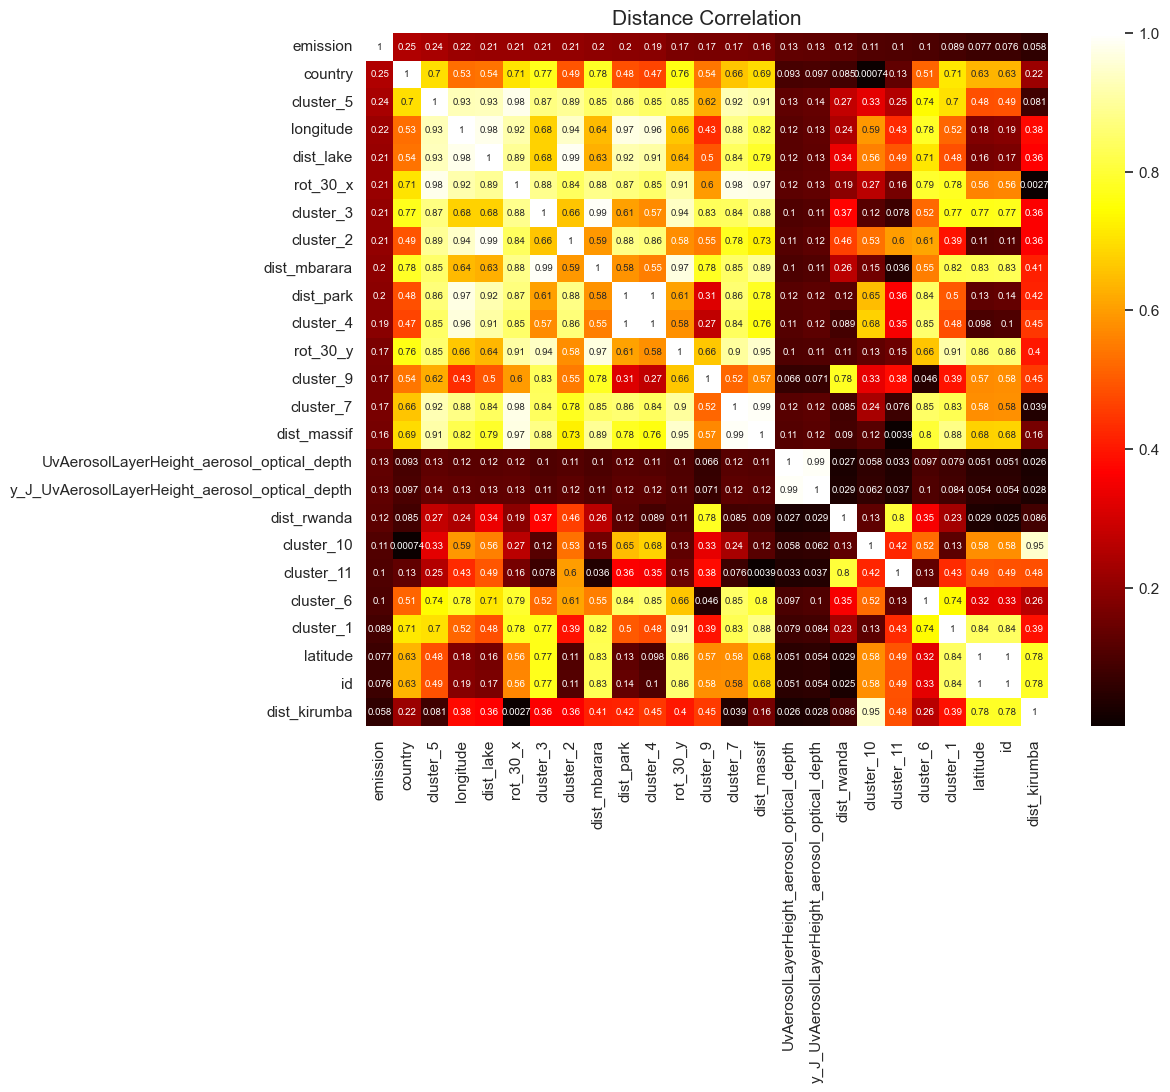

In [101]:
plt.figure(figsize=(11,9))
sns.heatmap(top_correlation, annot = True, cmap='hot', annot_kws={"fontsize":7})
plt.title('Distance Correlation', fontsize=15)

Now let's define a function that will check for best relations between columns: further data augmentation

In [102]:
from tqdm import tqdm

def better_features(train, test, target, cols, best_score):
    new_cols = []
    best_list=[]
    
    for i in tqdm(range(len(cols)), desc='Generating Columns'):
        col1 = cols[i]
        temp_df = pd.DataFrame()  # Temporary dataframe to store the generated columns
        temp_df_test = pd.DataFrame()  # Temporary dataframe for test data

        for j in range(i+1, len(cols)):
            col2 = cols[j]
            # Multiply
            temp_df[col1 + '*' + col2] = train[col1] * train[col2]
            temp_df_test[col1 + '*' + col2] = test[col1] * test[col2]

            # Divide (col1 / col2)
            temp_df[col1 + '/' + col2] = train[col1] / (train[col2] + 1e-5)
            temp_df_test[col1 + '/' + col2] = test[col1] / (test[col2] + 1e-5)

            # Divide (col2 / col1)
            temp_df[col2 + '/' + col1] = train[col2] / (train[col1] + 1e-5)
            temp_df_test[col2 + '/' + col1] = test[col2] / (test[col1] + 1e-5)

            # Subtract
            temp_df[col1 + '-' + col2] = train[col1] - train[col2]
            temp_df_test[col1 + '-' + col2] = test[col1] - test[col2]

            # Add
            temp_df[col1 + '+' + col2] = train[col1] + train[col2]
            temp_df_test[col1 + '+' + col2] = test[col1] + test[col2]

        SCORES = []
        
#         temp_df_cpy = temp_df.copy()
#         temp_df_cpy['emission'] = train['emission']
#         to_corr = temp_df_cpy.columns
        
#         dist_corr_emission = pd.DataFrame(cdist(temp_df_cpy[to_corr].T, temp_df_cpy[to_corr].T, metric='correlation'), columns=to_corr, index=to_corr).applymap(lambda x: abs(x-1))
#         highest_dcorr = dist_corr_emission.iloc[-1].drop('emission').idxmax()
#         highest_dcorr_val = dist_corr_emission.iloc[-1].drop('emission').max()
#         print(f'{highest_dcorr} {highest_dcorr_val}')
        
        for column in temp_df.columns:            
            model = LinearRegression()
            X = temp_df[column]
            y = train[target]
            
            scores = cross_val_score(model, X.to_numpy().reshape(-1, 1), y, scoring='neg_root_mean_squared_error')
                
            mean_score = abs(scores.mean())
            # print(mean_score)
            SCORES.append((column, mean_score))

        if SCORES:
            best_col, best_acc = sorted(SCORES, key=lambda x: x[1])[0]
            corr_with_other_cols = train.drop([target] + new_cols, axis=1).corrwith(temp_df[best_col])
#             print(corr_with_other_cols.abs().max())
            if (corr_with_other_cols.abs().max() < 0.99 or abs(best_acc) < best_score) and corr_with_other_cols.abs().max() !=1 :
                train[best_col] = temp_df[best_col]
                test[best_col] = temp_df_test[best_col]
                new_cols.append(best_col)
                print(f"Added column '{best_col}' with mean RMSE: {best_acc:.4f} & Correlation with emission {corr_with_other_cols.abs().max():.4f}, best_col: {best_col}")

    return train, test, new_cols

In [103]:
corr_top50_full_test = corr_top50_full.copy()
if 'emission' in corr_top50_full: corr_top50_full_test.remove('emission')
set(corr_top50_full) - set(corr_top50_full_test)

{'emission'}

In [104]:
from tqdm import tqdm
if 'emission' in corr_top50: corr_top50.remove('emission')
len(corr_top50)

# for partial
# filtered_train, filtered_test, new_cols=better_features(filtered_train, filtered_test, 'emission', corr_top50, overall_best_score)

# for full
train, test, new_cols = better_features(filtered_train, filtered_test, 'emission', corr_top50, overall_best_score)

Generating Columns:   0%|          | 0/24 [00:00<?, ?it/s]C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_df[col1 + '*' + col2] = train[col1] * train[col2]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_df_test[col1 + '*' + col2] = test[col1] * test[col2]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

Added column 'country+longitude' with mean RMSE: 126.1038 & Correlation with emission 0.9210, best_col: country+longitude


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:   8%|▊         | 2/24 [00:05<00:54,  2.48s/it]C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

Added column 'cluster_5*rot_30_y' with mean RMSE: 126.6390 & Correlation with emission 0.9943, best_col: cluster_5*rot_30_y


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  12%|█▎        | 3/24 [00:07<00:49,  2.34s/it]

Added column 'longitude*rot_30_x' with mean RMSE: 128.9904 & Correlation with emission 0.9829, best_col: longitude*rot_30_x


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  17%|█▋        | 4/24 [00:09<00:44,  2.24s/it]

Added column 'dist_lake+cluster_3' with mean RMSE: 127.9911 & Correlation with emission 0.9862, best_col: dist_lake+cluster_3


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  21%|██        | 5/24 [00:11<00:40,  2.12s/it]

Added column 'rot_30_x+UvAerosolLayerHeight_aerosol_optical_depth' with mean RMSE: 128.8984 & Correlation with emission 0.9986, best_col: rot_30_x+UvAerosolLayerHeight_aerosol_optical_depth


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  25%|██▌       | 6/24 [00:13<00:36,  2.03s/it]

Added column 'cluster_3-cluster_10' with mean RMSE: 127.8284 & Correlation with emission 0.9564, best_col: cluster_3-cluster_10


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  29%|██▉       | 7/24 [00:14<00:32,  1.89s/it]

Added column 'cluster_2+dist_mbarara' with mean RMSE: 128.2085 & Correlation with emission 0.9749, best_col: cluster_2+dist_mbarara


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  33%|███▎      | 8/24 [00:16<00:29,  1.84s/it]

Added column 'dist_mbarara-cluster_10' with mean RMSE: 127.3943 & Correlation with emission 0.9491, best_col: dist_mbarara-cluster_10


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  38%|███▊      | 9/24 [00:17<00:26,  1.76s/it]

Added column 'dist_park-cluster_9' with mean RMSE: 129.0690 & Correlation with emission 0.9515, best_col: dist_park-cluster_9


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  42%|████▏     | 10/24 [00:19<00:22,  1.63s/it]

Added column 'cluster_4-cluster_9' with mean RMSE: 129.0771 & Correlation with emission 0.9544, best_col: cluster_4-cluster_9


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  46%|████▌     | 11/24 [00:20<00:19,  1.51s/it]

Added column 'cluster_9/rot_30_y' with mean RMSE: 131.2770 & Correlation with emission 0.9884, best_col: cluster_9/rot_30_y


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  50%|█████     | 12/24 [00:21<00:16,  1.40s/it]

Added column 'cluster_9-cluster_7' with mean RMSE: 130.8847 & Correlation with emission 0.9604, best_col: cluster_9-cluster_7


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  54%|█████▍    | 13/24 [00:22<00:14,  1.31s/it]

Added column 'cluster_7*dist_massif' with mean RMSE: 130.8434 & Correlation with emission 0.9714, best_col: cluster_7*dist_massif


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  58%|█████▊    | 14/24 [00:23<00:12,  1.22s/it]

Added column 'dist_massif-dist_rwanda' with mean RMSE: 131.0433 & Correlation with emission 0.9525, best_col: dist_massif-dist_rwanda


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  62%|██████▎   | 15/24 [00:24<00:10,  1.14s/it]

Added column 'UvAerosolLayerHeight_aerosol_optical_depth*cluster_1' with mean RMSE: 134.4567 & Correlation with emission 0.9487, best_col: UvAerosolLayerHeight_aerosol_optical_depth*cluster_1


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  67%|██████▋   | 16/24 [00:25<00:08,  1.04s/it]

Added column 'y_J_UvAerosolLayerHeight_aerosol_optical_depth+latitude' with mean RMSE: 134.3154 & Correlation with emission 0.8063, best_col: y_J_UvAerosolLayerHeight_aerosol_optical_depth+latitude


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  71%|███████   | 17/24 [00:26<00:06,  1.06it/s]

Added column 'dist_rwanda-cluster_6' with mean RMSE: 131.6874 & Correlation with emission 0.9599, best_col: dist_rwanda-cluster_6


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  75%|███████▌  | 18/24 [00:26<00:05,  1.18it/s]

Added column 'cluster_10/latitude' with mean RMSE: 131.8347 & Correlation with emission 0.8225, best_col: cluster_10/latitude


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  79%|███████▉  | 19/24 [00:27<00:03,  1.32it/s]

Added column 'cluster_11-cluster_1' with mean RMSE: 132.0778 & Correlation with emission 0.9561, best_col: cluster_11-cluster_1


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  83%|████████▎ | 20/24 [00:27<00:02,  1.50it/s]

Added column 'cluster_6*cluster_1' with mean RMSE: 133.2898 & Correlation with emission 0.9145, best_col: cluster_6*cluster_1


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  88%|████████▊ | 21/24 [00:28<00:01,  1.74it/s]

Added column 'cluster_1*dist_kirumba' with mean RMSE: 133.7427 & Correlation with emission 0.8490, best_col: cluster_1*dist_kirumba


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[best_col] = temp_df[best_col]
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns:  92%|█████████▏| 22/24 [00:28<00:00,  2.04it/s]C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

Added column 'dist_kirumba/latitude' with mean RMSE: 131.2875 & Correlation with emission 0.7678, best_col: dist_kirumba/latitude


C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\2014982977.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[best_col] = temp_df_test[best_col]
Generating Columns: 100%|██████████| 24/24 [00:28<00:00,  1.20s/it]

Added column 'id-dist_kirumba' with mean RMSE: 132.5023 & Correlation with emission 0.9627, best_col: id-dist_kirumba


In [105]:
print(f)
to_corr

y_J_Cloud_solar_zenith_angle


['latitude',
 'longitude',
 'year',
 'week_no',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure'

C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\4046955478.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dist_corr_emission = pd.DataFrame(cdist(filtered_train[to_corr].T, filtered_train[to_corr].T, metric='correlation'), columns=to_corr, index=to_corr).applymap(lambda x: abs(x-1))
C:\Users\juziu\AppData\Local\Temp\ipykernel_13720\4046955478.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_correlation = pd.DataFrame(cdist(filtered_train[corr_top50].T, filtered_train[corr_top50].T, metric='correlation'), columns=corr_top50, index=corr_top50).applymap(lambda x: abs(x-1))


Text(0.5, 1.0, 'Distance Correlation')

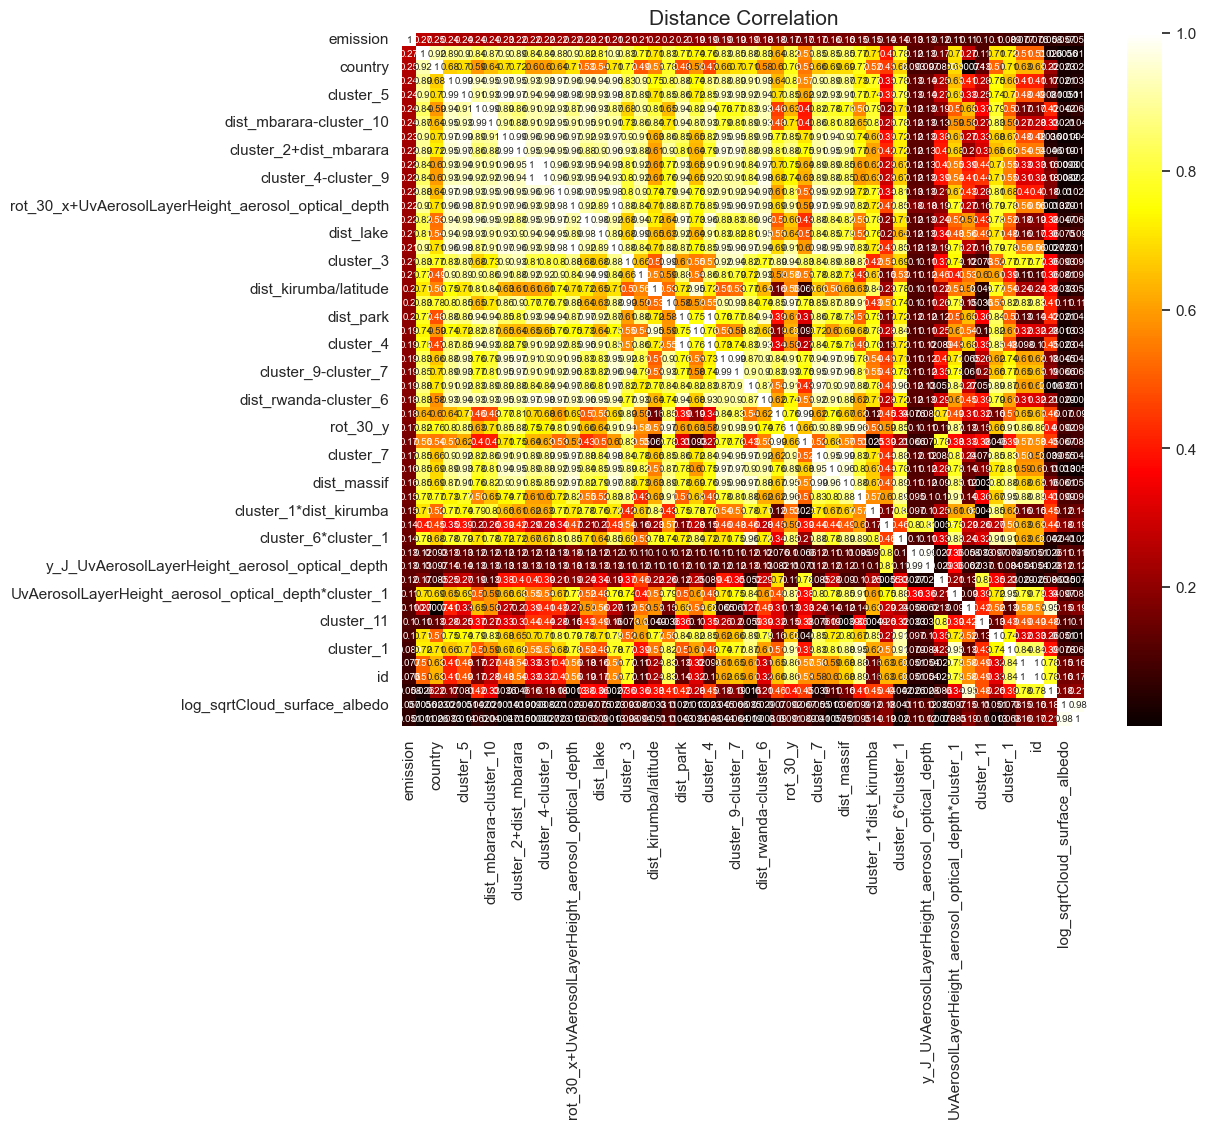

In [106]:
exist_cols = [f for f in filtered_train.columns if f not in ['emission', 'ID_LAT_LON_YEAR_WEEK']]
top_features = {}

to_corr = exist_cols.copy()
to_corr.append('emission')
# print(to_corr)

dist_corr_emission = pd.DataFrame(cdist(filtered_train[to_corr].T, filtered_train[to_corr].T, metric='correlation'), columns=to_corr, index=to_corr).applymap(lambda x: abs(x-1))
highest_dcorr = dist_corr_emission.iloc[-1].drop('emission').idxmax()
highest_dcorr_val = dist_corr_emission.iloc[-1].drop('emission').max()
# print(f'{highest_dcorr} {highest_dcorr_val}')

for f in exist_cols:
    X = filtered_train[[f]].values
    y = np.log1p(filtered_train["emission"].values)

    
    
    best_rmse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
    
    avg_rmse = np.mean(best_rmse)
    top_features[f] = avg_rmse

# Sort the features based on log loss in ascending order
sorted_top_features = sorted(top_features.items(), key=lambda x: x[1])

# Get the top 100 features with the least log loss
top_50_features = [feature for feature, _ in sorted_top_features[:50]]
# print("Top 50 features with the least RMSE:")
# print(top_50_features)

corr_top50 = list(dist_corr_emission['emission'].sort_values(ascending=False).head(50).index)
len(corr_top50)

top_correlation = pd.DataFrame(cdist(filtered_train[corr_top50].T, filtered_train[corr_top50].T, metric='correlation'), columns=corr_top50, index=corr_top50).applymap(lambda x: abs(x-1))

plt.figure(figsize=(11,9))
sns.heatmap(top_correlation, annot = True, cmap='hot', annot_kws={"fontsize":7})
plt.title('Distance Correlation', fontsize=15)

In [107]:
filtered_train.shape, filtered_test.shape

((38637, 182), (11907, 181))

In [108]:
train.shape, test.shape

((38637, 182), (11907, 181))

In [109]:
for f in unimportant_features:
    if f in filtered_train.columns: 
        filtered_train.drop(columns=f)
    if f in filtered_test.columns: 
        filtered_test.drop(columns=f)
filtered_train.shape, filtered_test.shape

((38637, 182), (11907, 181))

# Let's try modeling now with limited top 50 (49 actually) correlated features.

In [110]:
# X_train_prep = filtered_train[corr_top50].drop(['emission'], axis=1)
'''
y_train_prep = filtered_train['emission']
corr_top50_test = corr_top50.copy()
if 'emission' in corr_top50: corr_top50_test.remove('emission')
X_test_prep = filtered_test[corr_top50_test]

X_train_prep.shape, y_train_prep.shape, X_test_prep.shape
'''

# X_test_prep = test[corr_top50_full_test]

X_train_prep = train.drop(['emission'], axis=1)
y_train_prep = train['emission']

In [111]:
test.shape

(11907, 181)

In [112]:
X_train_prep.columns

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       ...
       'dist_massif-dist_rwanda',
       'UvAerosolLayerHeight_aerosol_optical_depth*cluster_1',
       'y_J_UvAerosolLayerHeight_aerosol_optical_depth+latitude',
       'dist_rwanda-cluster_6', 'cluster_10/latitude', 'cluster_11-cluster_1',
       'cluster_6*cluster_1', 'cluster_1*dist_kirumba',
       'dist_kirumba/latitude', 'id-dist_kirumba'],
      dtype='object', length=181)

In [113]:
# X_train_prep = X_train_prep[corr_top50_full_test]
X_train_prep.shape, y_train_prep.shape, test.shape

((38637, 181), (38637,), (11907, 181))

In [114]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoost, CatBoostRegressor,CatBoostClassifier
from catboost import Pool
from sklearn.ensemble import HistGradientBoostingRegressor,ExtraTreesRegressor,GradientBoostingRegressor, RandomForestRegressor
import optuna
from functools import partial
from sklearn.metrics import mean_squared_error

class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=5):
        self.test_size = test_size
        self.kfold = kfold
        self.n_splits = n_splits

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

class Regressor:
    def __init__(self, n_estimators=100, device="gpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.reg_models = self._define_reg_model()
        self.len_models = len(self.reg_models)
        
    def _define_reg_model(self):
        
        xgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 6,
            'learning_rate': 0.0116,
            'colsample_bytree': 1,
            'subsample': 0.6085,
            'min_child_weight': 9,
            'reg_lambda': 4.879e-07,
            'max_bin': 431,
            #'booster': 'dart',
            'n_jobs': -1,
            'eval_metric': 'rmse',
            'objective': "reg:squarederror",
            #'tree_method': 'hist',
            'verbosity': 0,
            'random_state': self.random_state,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
        
        xgb_params1=xgb_params.copy()
        xgb_params1['subsample']=0.7
        xgb_params1['max_depth']=6
#         xgb_params1['learning_rate']=0.01
        xgb_params1['colsample_bytree']=0.6

        xgb_params2=xgb_params.copy()
        xgb_params2['subsample']=0.5
        xgb_params2['max_depth']=8
        xgb_params2['learning_rate']=0.047
        xgb_params2['colsample_bytree']=0.9
        xgb_params2['tree_method']='approx'

        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 6,
            "num_leaves": 16,
            'learning_rate': 0.05,
            'subsample': 0.7,
            'colsample_bytree': 0.8,
            #'reg_alpha': 0.25,
            'reg_lambda': 5e-07,
            'objective': 'regression_l2',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state
        }
        lgb_params1=lgb_params.copy()
        lgb_params1['subsample']=0.9
        lgb_params1['reg_lambda']=0.8994221730208598
        lgb_params1['reg_alpha']=0.6236579699090548
        lgb_params1['max_depth']=6
        lgb_params1['learning_rate']=0.01
        lgb_params1['colsample_bytree']=0.5

        lgb_params2=lgb_params.copy()
        lgb_params2['subsample']=0.1
        lgb_params2['reg_lambda']=0.5940716788024517
        lgb_params2['reg_alpha']=0.4300477974434703
        lgb_params2['max_depth']=8
        lgb_params2['learning_rate']=0.019000000000000003
        lgb_params2['colsample_bytree']=0.8
        lgb_params3 = {
            'n_estimators': self.n_estimators,
            'num_leaves': 45,
            'max_depth': 5,
            'learning_rate': 0.0684383311038932,
            'subsample': 0.5758412171285148,
            'colsample_bytree': 0.8599714680300794,
            'reg_lambda': 1.597717830931487e-08,
            'objective': 'regression_l2',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
            'verbosity': 0,
            'force_col_wise': True
        }
        lgb_params4=lgb_params.copy()
        lgb_params4['subsample']=0.3
        lgb_params4['reg_lambda']=0.5488355125638069
        lgb_params4['reg_alpha']=0.23414681424407247
        lgb_params4['max_depth']=7
        lgb_params4['learning_rate']=0.019000000000000003
        lgb_params4['colsample_bytree']=0.5

        cb_params = {
            'iterations': self.n_estimators,
            'depth': 6,
            'learning_rate': 0.02,
            'l2_leaf_reg': 0.5,
            'random_strength': 0.2,
            'max_bin': 150,
            'od_wait': 80,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'IncToDec',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }
        cb_sym_params = cb_params.copy()
        cb_sym_params['grow_policy'] = 'SymmetricTree'
        cb_loss_params = cb_params.copy()
        cb_loss_params['grow_policy'] = 'Lossguide'
    
        cb_params1 = {
            'iterations': self.n_estimators,
            'depth': 8,
            'learning_rate': 0.01,
            'l2_leaf_reg': 0.1,
            'random_strength': 0.2,
            'max_bin': 150,
            'od_wait': 50,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bernoulli',
            'od_type': 'Iter',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }
        cb_params2= {
            'n_estimators': self.n_estimators,
            'depth': 10,
            'learning_rate': 0.08827842054729117,
            'l2_leaf_reg': 4.8351074756668864e-05,
            'random_strength': 0.21306687539993183,
            'max_bin': 483,
            'od_wait': 97,
            'grow_policy': 'Lossguide',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
            'silent': True
        }
        dt_params= {'min_samples_split': 80, 'min_samples_leaf': 30, 'max_depth': 8, 'criterion': 'absolute_error'}
        knn_params= {'weights': 'uniform', 'p': 1, 'n_neighbors': 12, 'leaf_size': 20, 'algorithm': 'kd_tree'}

        reg_models = {
            'xgb_reg': xgb.XGBRegressor(**xgb_params),
#             'xgb_reg1': xgb.XGBRegressor(**xgb_params1),
            'xgb_reg2': xgb.XGBRegressor(**xgb_params2),
            'lgb_reg': lgb.LGBMRegressor(**lgb_params),
#             'lgb2_reg': lgb.LGBMRegressor(**lgb_params1),
            'lgb3_reg': lgb.LGBMRegressor(**lgb_params2),
#             'lgb4_reg': lgb.LGBMRegressor(**lgb_params3),
            'lgb5_reg': lgb.LGBMRegressor(**lgb_params4),
            "hgbm": HistGradientBoostingRegressor(max_iter=self.n_estimators, learning_rate=0.01, loss="squared_error", 
                                                  n_iter_no_change=300,random_state=self.random_state),
            'cat_reg': CatBoostRegressor(**cb_params),
#             'cat_reg2': CatBoostRegressor(**cb_params1),
#             'cat_reg3': CatBoostRegressor(**cb_params2),
            "cat_sym": CatBoostRegressor(**cb_sym_params),
#             "cat_loss": CatBoostRegressor(**cb_loss_params),
            'etr': ExtraTreesRegressor(min_samples_split=55, min_samples_leaf= 15, max_depth=10,
                                       n_estimators=200,random_state=self.random_state),
#             'ann':ann,
            "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=6,loss="squared_error", random_state=self.random_state),
#             "RandomForestRegressor": RandomForestRegressor(max_depth= 6,max_features= 'auto',min_samples_split= 4,
#                                                            min_samples_leaf= 4,  n_estimators=500, random_state=self.random_state, n_jobs=-1),
#             'dt': DecisionTreeRegressor(**dt_params),
            
#             "lr":LinearRegression(),
#             "knn":KNeighborsRegressor(**knn_params),
#             "PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=3000, tol=1e-3, n_iter_no_change=30, random_state=self.random_state),
#             "HuberRegressor": HuberRegressor(max_iter=3000),
        }

        return reg_models
    
class OptunaWeights:
    def __init__(self, random_state):
        self.study = None
        self.weights = None
        self.random_state = random_state

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 0, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the RMSE score for the weighted prediction
        score = np.sqrt(mean_squared_error(y_true, weighted_pred))
        return score

    def fit(self, y_true, y_preds, n_trials=1000):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        self.study = optuna.create_study(sampler=sampler, study_name="OptunaWeights", direction='minimize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds, n_trials=300):
        self.fit(y_true, y_preds, n_trials=n_trials)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

In [115]:
'''
from sklearn.model_selection import KFold
import gc
from copy import deepcopy

kfold = True
n_splits = 1 if not kfold else 5
random_state = 42
random_state_list = [42] 
n_estimators = 9999 
early_stopping_rounds = 600
verbose = False
device = 'cpu'

splitter = Splitter(kfold=kfold, n_splits=n_splits)


# Initialize an array for storing test predictions
test_predss = np.zeros(X_test_prep.shape[0])
ensemble_score = []
weights = []
trained_models = dict(zip(Regressor().reg_models.keys(), [[] for _ in range(Regressor().len_models)]))
trained_models = {'lgb_reg':[]}

# Evaluate on validation data and store predictions on test data
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train_prep, y_train_prep, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits

    # Get a set of Regressor models
    reg = Regressor(n_estimators, device, random_state)
    models = reg.reg_models

    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []

    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        if name in ['cat_reg','cat_sym']:
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        elif name=='lgb_reg':
            lgb.early_stopping(stopping_rounds=early_stopping_rounds)
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)])
        elif name=='hgbm':
            model.fit(X_train_, y_train_)
        elif name=='ann':
            model.fit(X_train_, y_train_, validation_data=(X_val, y_val),batch_size=2, epochs=60,verbose=verbose)
        else:
            model.fit(X_train_, y_train_)
        if name=="ann":
            y_val_pred = model.predict(X_val)[:,0]
            test_pred = model.predict(X_test_prep)[:,0]
        else:
            y_val_pred = model.predict(X_val)
            test_pred = model.predict(X_test_prep)

        

#         # Convert predicted values back to their original scale by applying the expm1 function
#         y_val_pred = np.expm1(y_val_pred)
#         test_pred = np.expm1(test_pred)

        score = np.sqrt(mean_squared_error(y_val, y_val_pred))
#         score = rmse(np.expm1(y_val), y_val_pred)

        print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] RMSE score: {score:.5f}')

        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))

    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
#     y_val_pred = optweights.fit_predict(np.expm1(y_val.values), oof_preds)

    score = np.sqrt(mean_squared_error(y_val, y_val_pred))
#     score = rmse(np.expm1(y_val), y_val_pred)

    print(f'Ensemble [FOLD-{n} SEED-{random_state_list[m]}] RMSE score {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))

    gc.collect()
    '''

'\nfrom sklearn.model_selection import KFold\nimport gc\nfrom copy import deepcopy\n\nkfold = True\nn_splits = 1 if not kfold else 5\nrandom_state = 42\nrandom_state_list = [42] \nn_estimators = 9999 \nearly_stopping_rounds = 600\nverbose = False\ndevice = \'cpu\'\n\nsplitter = Splitter(kfold=kfold, n_splits=n_splits)\n\n\n# Initialize an array for storing test predictions\ntest_predss = np.zeros(X_test_prep.shape[0])\nensemble_score = []\nweights = []\ntrained_models = dict(zip(Regressor().reg_models.keys(), [[] for _ in range(Regressor().len_models)]))\ntrained_models = {\'lgb_reg\':[]}\n\n# Evaluate on validation data and store predictions on test data\nfor i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train_prep, y_train_prep, random_state_list=random_state_list)):\n    n = i % n_splits\n    m = i // n_splits\n\n    # Get a set of Regressor models\n    reg = Regressor(n_estimators, device, random_state)\n    models = reg.reg_models\n\n    # Initialize lis

In [116]:
X_train_prep.shape, y_train_prep.shape

((38637, 181), (38637,))

# Last feature selection using feature importance for gradientBoosting

In [117]:

def get_most_important_features(X_train, y_train, n,model_input):
    # Initialize XGBoost Regressor with specified parameters
    
    lgb_params = {
            'n_estimators': 100,
            'max_depth': 6,
            "num_leaves": 16,
            'learning_rate': 0.05,
            'subsample': 0.7,
            'colsample_bytree': 0.8,
            #'reg_alpha': 0.25,
            'reg_lambda': 5e-07,
            'objective': 'regression_l2',
            'metric': 'mean_absolute_error',
            'boosting_type': 'gbdt',
            'random_state': 42
        }
    cb_params = {
            'iterations': 100,
            'depth': 6,
            'learning_rate': 0.02,
            'l2_leaf_reg': 0.5,
            'random_strength': 0.2,
            'max_bin': 150,
            'od_wait': 80,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'IncToDec',
            'eval_metric': 'RMSE',
            'loss_function': 'RMSE',
            'random_state': 42
        }
    if 'xgb' in model_input:
        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=50,
            learning_rate=0.02,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
            )
    elif 'cat' in model_input:
        model=CatBoostRegressor(**cb_params)
    else:
        model=lgb.LGBMRegressor(**lgb_params)
    

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    rmses = []

    for train_idx, val_idx in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        try:
            model.fit(X_train_fold, y_train_fold, verbose=0)
        except:
            model.fit(X_train_fold, y_train_fold)

        y_pred = model.predict(X_val_fold)

        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
#         rmse = np.sqrt(mean_squared_error(np.expm1(y_val_fold), np.expm1(y_pred)))

        rmses.append(rmse)

    avg_rmse = np.mean(rmses)

    feature_importances = model.feature_importances_

    feature_importance_list = [(X_train.columns[i], importance) for i, importance in enumerate(feature_importances)]

    sorted_features = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

    top_n_features = [feature[0] for feature in sorted_features[:n]]
    print(avg_rmse)
    return top_n_features

In [118]:
from sklearn.model_selection import KFold
n_imp_features_cat=get_most_important_features(X_train_prep, y_train_prep, 10, 'cat')
n_imp_features_xgb=get_most_important_features(X_train_prep, y_train_prep, 30, 'xgb')
n_imp_features_lgbm=get_most_important_features(X_train_prep, y_train_prep, 30, 'lgbm')

40.24469086319638
77.59090907639953
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 43426
[LightGBM] [Info] Number of data points in the train set: 30909, number of used features: 181
[LightGBM] [Info] Start training from score 76.211785
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 43426
[LightGBM] [Info] Number of data points in the train set: 30909, number of used features: 181
[LightGBM] [Info] Start training from score 76.371347
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 43426
[LightGBM] [Info] Number of data points in the train set: 30910, num

In [119]:
n_imp_features=[*set(n_imp_features_xgb+n_imp_features_lgbm+n_imp_features_cat)]
print(f"{len(n_imp_features)} features have been selected from three algorithms for the final model")

41 features have been selected from three algorithms for the final model


In [120]:
X_train_prep=X_train_prep[n_imp_features]
X_test_prep=test[n_imp_features]

In [121]:
from sklearn.model_selection import KFold
import gc
from copy import deepcopy

kfold = True
n_splits = 1 if not kfold else 5
random_state = 42
random_state_list = [42] 
n_estimators = 9999 
early_stopping_rounds = 600
verbose = False
device = 'cpu'

splitter = Splitter(kfold=kfold, n_splits=n_splits)


# Initialize an array for storing test predictions
test_predss = np.zeros(X_test_prep.shape[0])
ensemble_score = []
weights = []
trained_models = dict(zip(Regressor().reg_models.keys(), [[] for _ in range(Regressor().len_models)]))
trained_models = {'lgb_reg':[]}

# Evaluate on validation data and store predictions on test data
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train_prep, y_train_prep, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits

    # Get a set of Regressor models
    reg = Regressor(n_estimators, device, random_state)
    models = reg.reg_models

    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []

    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        if name in ['cat_reg','cat_sym']:
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        elif name=='lgb_reg':
            lgb.early_stopping(stopping_rounds=early_stopping_rounds)
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)])
        elif name=='hgbm':
            model.fit(X_train_, y_train_)
        elif name=='ann':
            model.fit(X_train_, y_train_, validation_data=(X_val, y_val),batch_size=2, epochs=60,verbose=verbose)
        else:
            model.fit(X_train_, y_train_)
        if name=="ann":
            y_val_pred = model.predict(X_val)[:,0]
            test_pred = model.predict(X_test_prep)[:,0]
        else:
            y_val_pred = model.predict(X_val)
            test_pred = model.predict(X_test_prep)

        

#         # Convert predicted values back to their original scale by applying the expm1 function
#         y_val_pred = np.expm1(y_val_pred)
#         test_pred = np.expm1(test_pred)

        score = np.sqrt(mean_squared_error(y_val, y_val_pred))
#         score = rmse(np.expm1(y_val), y_val_pred)

        print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] RMSE score: {score:.5f}')

        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))

    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
#     y_val_pred = optweights.fit_predict(np.expm1(y_val.values), oof_preds)

    score = np.sqrt(mean_squared_error(y_val, y_val_pred))
#     score = rmse(np.expm1(y_val), y_val_pred)

    print(f'Ensemble [FOLD-{n} SEED-{random_state_list[m]}] RMSE score {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))

    gc.collect()

xgb_reg [FOLD-0 SEED-42] RMSE score: 9.70304
xgb_reg2 [FOLD-0 SEED-42] RMSE score: 11.12015
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9269
[LightGBM] [Info] Number of data points in the train set: 30909, number of used features: 41
[LightGBM] [Info] Start training from score 76.211785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
lgb_reg [FOLD-0 SEED-42] RMSE score: 9.55699
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_

In [122]:
sol = pd.DataFrame(model.feature_importances_, columns=['importance'])
sol['feature_name'] = pd.Series(n_imp_features)
sol.sort_values(by='importance', ascending=False)

importance                     feature_name
40    0.146020                        dist_lake
27    0.120210                country+longitude
4     0.100472           cluster_2+dist_mbarara
16    0.075390                        cluster_5
15    0.068808              cluster_9-cluster_7
32    0.056368          dist_massif-dist_rwanda
26    0.054555              dist_lake+cluster_3
18    0.054352               cluster_5*rot_30_y
12    0.051065               longitude*rot_30_x
35    0.043620                         rot_30_x
19    0.034767            cluster_7*dist_massif
7     0.020323                        longitude
29    0.013998                        cluster_9
17    0.012839             cluster_3-cluster_10
38    0.010753             cluster_11-cluster_1
2     0.010491              dist_park-cluster_9
24    0.009824            dist_kirumba/latitude
3     0.009817                      dist_massif
21    0.009767                        cluster_7
36    0.008430              cluster_10/latitude
23    0.008029                        cluster_8
37    0.007422                        cluster_0
31    0.006945                     dist_mbarara
6     0.006403                        cluster_3
28    0.006389                        cluster_2
34    0.005182               cluster_9/rot_30_y
22    0.005131                         dist_muy
39    0.005109            dist_rwanda-cluster_6
13    0.004970                         latitude
30    0.004176                         rot_30_y
1     0.003992                     dist_kirumba
9     0.003562  Ozone_solar_azimuth_angle_lag_1
0     0.003086                         is_covid
25    0.003069                      dist_rwanda
11    0.003058                        cluster_4
20    0.002816                            month
8     0.002522                        cluster_1
33    0.002472                        dist_park
5     0.002148                       cluster_11
14    0.001421                        cluster_6
10    0.000229                          country

In [123]:
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble RMSE score {mean_score:.5f} ± {std_score:.5f}')

# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name} {mean_weight:.5f} ± {std_weight:.5f}')

Ensemble RMSE score 8.83703 ± 0.90874
--- Model Weights ---
xgb_reg 0.25490 ± 0.30792
xgb_reg2 0.28527 ± 0.33276
lgb_reg 0.44309 ± 0.19798
lgb3_reg 0.65362 ± 0.26100
lgb5_reg 0.36674 ± 0.26987
hgbm 0.53113 ± 0.33076
cat_reg 0.26704 ± 0.17120
cat_sym 0.72781 ± 0.16291
etr 0.01230 ± 0.01011
GradientBoostingRegressor 0.33397 ± 0.19092


# Practical summary
Code further below is responsible for our submission for the kaggle competition. Actual RMSE score that we got was `17.35703`, which is a very good practical result, although it certainly was not the best.  
After some time, code below probably may not work as intended anymore, however the score stands. The competition was very informative and well conducted.  
*Made by Mikołaj Hojda, Michał Jurzak, Eryk Mikołajek*

# Post Processing

In [ ]:
# for full test
sub = pd.read_csv(os.path.join(path, "test.csv"))
sub['emission'] = test_predss
sub = sub[['ID_LAT_LON_YEAR_WEEK', 'emission']]
#sub.to_csv('predictions_3_full.csv',index=False)

# some post-processing
sub['latitude'] = test['latitude']
sub['longitude'] = test['longitude']
sub['emission_avg'] = sub.groupby(['latitude','longitude']).transform('mean')

# Scale up those locations with high emissions (top 50%) by 1.05
multiplier = 1.05
sub.loc[sub['emission_avg']>sub['emission_avg'].median(), 'emission'] = sub.loc[sub['emission_avg']>sub['emission_avg'].median(), 'emission']*multiplier

sub.loc[test['longitude']==29.321, 'emission'] = train.loc[(train['year']==2021)&(train['week_no']<=48)&(train['longitude']==29.321),'emission'].values

In [ ]:
train_copy = train.copy()
test_copy = test.copy()
if "lat_lon" not in train_copy.columns:
    train_copy.insert(2,"lat_lon", list(zip(train["latitude"],train["longitude"])))

# Location of each station
locations = train_copy["lat_lon"].unique()

# Function to get emissions for specified year and location. Only use first 49 weeks.
def get_emissions_loc_year( loc, year ):
    df = train_copy[(train_copy["lat_lon"]==loc) & (train_copy["year"]==year) & (train_copy["week_no"]<49)].copy()
    return df["emission"].values

def get_emissions_max( loc ):
    emiss2019 = get_emissions_loc_year(loc,2019)
    emiss2020 = get_emissions_loc_year(loc,2020)
    emiss2021 = get_emissions_loc_year(loc,2021)
    return np.max([emiss2019,emiss2020,emiss2021],axis=0)

predictions_acc = []
for loc in locations:
    emission = get_emissions_max( loc )
    predictions_acc.append( emission )
#
predictions_2022 = np.hstack(predictions_acc)

sub["emission"]=np.maximum(predictions_2022,np.array(sub["emission"]))

# For longitude 28.467 and latitude 1.833, there were no emissions across all datapoints
sub.loc[(test_copy['longitude']==29.321) & (test_copy['longitude']==1.833), 'emission'] =0
sub = sub[['ID_LAT_LON_YEAR_WEEK','emission']]

del train_copy
del test_copy

In [ ]:
# save submission:
sub.to_csv('predictions_2_full.csv',index=False)

In [ ]:
# for partial test
seasonal_zeros_predictions = pd.read_csv('seasonal_zeros_predictions.csv')
seasonal_zeros_predictions[seasonal_zeros_predictions['emission']==0]

ID_LAT_LON_YEAR_WEEK  emission
12667  ID_-2.898_29.002_2019_00       0.0
12668  ID_-2.898_29.002_2019_01       0.0
12669  ID_-2.898_29.002_2019_02       0.0
12670  ID_-2.898_29.002_2019_03       0.0
12671  ID_-2.898_29.002_2019_04       0.0
...                         ...       ...
12821  ID_-2.898_29.002_2021_48       0.0
12822  ID_-2.898_29.002_2021_49       0.0
12823  ID_-2.898_29.002_2021_50       0.0
12824  ID_-2.898_29.002_2021_51       0.0
12825  ID_-2.898_29.002_2021_52       0.0

[159 rows x 2 columns]

In [ ]:
seasonal_zeros_predictions['id_len'] = seasonal_zeros_predictions['ID_LAT_LON_YEAR_WEEK'].str.len()
seasonal_zeros_predictions[seasonal_zeros_predictions['id_len']==22]

ID_LAT_LON_YEAR_WEEK  emission  id_len
901    ID_-0.95_31.45_2022_00  1.782067      22
902    ID_-0.95_31.45_2022_01  1.716780      22
903    ID_-0.95_31.45_2022_02  1.765506      22
904    ID_-0.95_31.45_2022_03  1.891369      22
905    ID_-0.95_31.45_2022_04  1.964721      22
...                       ...       ...     ...
12397  ID_-2.97_30.03_2022_48  7.312126      22
12398  ID_-2.97_30.03_2022_49  6.969083      22
12399  ID_-2.97_30.03_2022_50  6.730043      22
12400  ID_-2.97_30.03_2023_51  6.660627      22
12401  ID_-2.97_30.03_2023_52  6.728164      22

[1113 rows x 3 columns]

In [ ]:
def format_number(number):
    return '{:.3f}'.format(float(number))

seasonal_zeros_predictions['ID_LAT_LON_YEAR_WEEK'] = seasonal_zeros_predictions['ID_LAT_LON_YEAR_WEEK'].apply(lambda x: '_'.join([format_number(part) if '.' in part else part for part in x.split('_')]))

In [ ]:
seasonal_zeros_predictions['ID_LAT_LON_YEAR_WEEK'].str.len().value_counts()

24    12826
Name: ID_LAT_LON_YEAR_WEEK, dtype: int64

In [ ]:
seasonal_zeros_predictions

ID_LAT_LON_YEAR_WEEK  emission  id_len
0      ID_-0.547_29.653_2022_00  0.557865      24
1      ID_-0.547_29.653_2022_01  0.565758      24
2      ID_-0.547_29.653_2022_02  0.583503      24
3      ID_-0.547_29.653_2022_03  0.598457      24
4      ID_-0.547_29.653_2022_04  0.602378      24
...                         ...       ...     ...
12821  ID_-2.898_29.002_2021_48  0.000000      24
12822  ID_-2.898_29.002_2021_49  0.000000      24
12823  ID_-2.898_29.002_2021_50  0.000000      24
12824  ID_-2.898_29.002_2021_51  0.000000      24
12825  ID_-2.898_29.002_2021_52  0.000000      24

[12826 rows x 3 columns]

In [ ]:
pattern = r'[-]?(\d+\.\d{2}(?=_))'
seasonal_zeros_predictions['ID_LAT_LON_YEAR_WEEK'].str.findall(pattern).value_counts()

[]    12826
Name: ID_LAT_LON_YEAR_WEEK, dtype: int64

In [ ]:
pattern = r'[-]?(\d+\.\d{3})'
print(seasonal_zeros_predictions['ID_LAT_LON_YEAR_WEEK'].str.findall(pattern))
list_of_points = seasonal_zeros_predictions['ID_LAT_LON_YEAR_WEEK'].str.findall(pattern)
for i, r in seasonal_zeros_predictions.iterrows():
    # print(tuple(list_of_points[i]))
    seasonal_zeros_predictions.loc[i, 'latitude'] = list_of_points[i][0]
    seasonal_zeros_predictions.loc[i, 'longitude'] = list_of_points[i][1]
seasonal_zeros_predictions.drop(seasonal_zeros_predictions[seasonal_zeros_predictions['emission']==0].index, inplace=True)
seasonal_zeros_predictions.columns

0        [0.547, 29.653]
1        [0.547, 29.653]
2        [0.547, 29.653]
3        [0.547, 29.653]
4        [0.547, 29.653]
              ...       
12662    [3.161, 28.839]
12663    [3.161, 28.839]
12664    [3.161, 28.839]
12665    [3.161, 28.839]
12666    [3.161, 28.839]
Name: ID_LAT_LON_YEAR_WEEK, Length: 12667, dtype: object


Index(['ID_LAT_LON_YEAR_WEEK', 'emission', 'id_len', 'coords', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
seasonal_zeros_predictions

ID_LAT_LON_YEAR_WEEK  emission  id_len latitude longitude
0      ID_-0.547_29.653_2022_00  0.557865      24    0.547    29.653
1      ID_-0.547_29.653_2022_01  0.565758      24    0.547    29.653
2      ID_-0.547_29.653_2022_02  0.583503      24    0.547    29.653
3      ID_-0.547_29.653_2022_03  0.598457      24    0.547    29.653
4      ID_-0.547_29.653_2022_04  0.602378      24    0.547    29.653
...                         ...       ...     ...      ...       ...
12662  ID_-3.161_28.839_2022_48  0.142231      24    3.161    28.839
12663  ID_-3.161_28.839_2022_49  0.138434      24    3.161    28.839
12664  ID_-3.161_28.839_2022_50  0.132867      24    3.161    28.839
12665  ID_-3.161_28.839_2023_51  0.127588      24    3.161    28.839
12666  ID_-3.161_28.839_2023_52  0.124937      24    3.161    28.839

[12667 rows x 5 columns]

It's obvious there are no 2023 predictions, so we need to remove them. Also there are no more than 49 weeks in test data.

In [ ]:
pattern = r'(\d+)$'

seasonal_zeros_predictions['week'] = seasonal_zeros_predictions['ID_LAT_LON_YEAR_WEEK'].str.extract(pattern).astype(int)
seasonal_zeros_predictions = seasonal_zeros_predictions[seasonal_zeros_predictions['week'] <= 48]
seasonal_zeros_predictions

ID_LAT_LON_YEAR_WEEK  emission  id_len latitude longitude  week
0      ID_-0.547_29.653_2022_00  0.557865      24    0.547    29.653     0
1      ID_-0.547_29.653_2022_01  0.565758      24    0.547    29.653     1
2      ID_-0.547_29.653_2022_02  0.583503      24    0.547    29.653     2
3      ID_-0.547_29.653_2022_03  0.598457      24    0.547    29.653     3
4      ID_-0.547_29.653_2022_04  0.602378      24    0.547    29.653     4
...                         ...       ...     ...      ...       ...   ...
12658  ID_-3.161_28.839_2022_44  0.141811      24    3.161    28.839    44
12659  ID_-3.161_28.839_2022_45  0.142073      24    3.161    28.839    45
12660  ID_-3.161_28.839_2022_46  0.143018      24    3.161    28.839    46
12661  ID_-3.161_28.839_2022_47  0.143533      24    3.161    28.839    47
12662  ID_-3.161_28.839_2022_48  0.142231      24    3.161    28.839    48

[11711 rows x 6 columns]

In [ ]:
filtered_test_labels.shape

(11907, 3)

In [ ]:
filtered_test_labels

ID_LAT_LON_YEAR_WEEK  latitude  longitude
0      ID_-0.510_29.290_2022_00    -0.510     29.290
1      ID_-0.510_29.290_2022_01    -0.510     29.290
2      ID_-0.510_29.290_2022_02    -0.510     29.290
3      ID_-0.510_29.290_2022_03    -0.510     29.290
4      ID_-0.510_29.290_2022_04    -0.510     29.290
...                         ...       ...        ...
12637  ID_-3.299_30.301_2022_44    -3.299     30.301
12638  ID_-3.299_30.301_2022_45    -3.299     30.301
12639  ID_-3.299_30.301_2022_46    -3.299     30.301
12640  ID_-3.299_30.301_2022_47    -3.299     30.301
12641  ID_-3.299_30.301_2022_48    -3.299     30.301

[11907 rows x 3 columns]

In [ ]:
filtered_test_labels.reset_index(inplace=True)
test_results= pd.DataFrame(test_predss, columns=['emission'])
test_results['ID_LAT_LON_YEAR_WEEK']=filtered_test_labels['ID_LAT_LON_YEAR_WEEK']
test_results

emission      ID_LAT_LON_YEAR_WEEK
0       3.641194  ID_-0.510_29.290_2022_00
1       4.393818  ID_-0.510_29.290_2022_01
2       4.173482  ID_-0.510_29.290_2022_02
3       4.318334  ID_-0.510_29.290_2022_03
4       4.390579  ID_-0.510_29.290_2022_04
...          ...                       ...
11902  29.709568  ID_-3.299_30.301_2022_44
11903  29.967783  ID_-3.299_30.301_2022_45
11904  30.048843  ID_-3.299_30.301_2022_46
11905  29.982635  ID_-3.299_30.301_2022_47
11906  29.777530  ID_-3.299_30.301_2022_48

[11907 rows x 2 columns]

In [ ]:
test_results.isna().value_counts()

emission  ID_LAT_LON_YEAR_WEEK
False     False                   11907
dtype: int64

In [ ]:
sub = test_results.append(seasonal_zeros_predictions[['ID_LAT_LON_YEAR_WEEK','emission']])
sub # need to append zeros too

C:\Users\juziu\AppData\Local\Temp\ipykernel_11108\2052976612.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub = test_results.append(seasonal_zeros_predictions[['ID_LAT_LON_YEAR_WEEK','emission']])


emission      ID_LAT_LON_YEAR_WEEK
0      3.641194  ID_-0.510_29.290_2022_00
1      4.393818  ID_-0.510_29.290_2022_01
2      4.173482  ID_-0.510_29.290_2022_02
3      4.318334  ID_-0.510_29.290_2022_03
4      4.390579  ID_-0.510_29.290_2022_04
...         ...                       ...
12658  0.141811  ID_-3.161_28.839_2022_44
12659  0.142073  ID_-3.161_28.839_2022_45
12660  0.143018  ID_-3.161_28.839_2022_46
12661  0.143533  ID_-3.161_28.839_2022_47
12662  0.142231  ID_-3.161_28.839_2022_48

[23618 rows x 2 columns]

In [ ]:
sub[sub['ID_LAT_LON_YEAR_WEEK']=='ID_-0.95_31.45_2022_00']

Empty DataFrame
Columns: [emission, ID_LAT_LON_YEAR_WEEK]
Index: []

In [ ]:

seasonal_zeros_predictions[seasonal_zeros_predictions['ID_LAT_LON_YEAR_WEEK']=='ID_-0.95_31.45_2022_00']

Empty DataFrame
Columns: [ID_LAT_LON_YEAR_WEEK, emission, id_len, latitude, longitude, week]
Index: []

In [ ]:
mask = test_labels.set_index(['latitude','longitude']).index.isin(zeros.set_index(['latitude','longitude']).index)

zeros_ids = test_labels[mask]
zeros_ids['emission'] = 0
zeros_ids = zeros_ids[['ID_LAT_LON_YEAR_WEEK','emission']]
zeros_ids

C:\Users\juziu\AppData\Local\Temp\ipykernel_11108\320283953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeros_ids['emission'] = 0


ID_LAT_LON_YEAR_WEEK  emission
6321   ID_-1.328_28.872_2022_00         0
6322   ID_-1.328_28.872_2022_01         0
6323   ID_-1.328_28.872_2022_02         0
6324   ID_-1.328_28.872_2022_03         0
6325   ID_-1.328_28.872_2022_04         0
...                         ...       ...
22486  ID_-2.898_29.002_2022_44         0
22487  ID_-2.898_29.002_2022_45         0
22488  ID_-2.898_29.002_2022_46         0
22489  ID_-2.898_29.002_2022_47         0
22490  ID_-2.898_29.002_2022_48         0

[735 rows x 2 columns]

In [ ]:
sub = sub.append(zeros_ids)
sub.shape

C:\Users\juziu\AppData\Local\Temp\ipykernel_11108\3421218390.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sub = sub.append(zeros_ids)


(24353, 2)

In [ ]:
24353-sub['ID_LAT_LON_YEAR_WEEK'].value_counts().count()

0

In [ ]:
sub['ID_LAT_LON_YEAR_WEEK'].isna().value_counts()

False    24353
Name: ID_LAT_LON_YEAR_WEEK, dtype: int64

In [ ]:
sub['emission'].value_counts()

0.000000     735
56.834303      4
54.532418      3
57.508488      3
51.990463      3
            ... 
65.326445      1
61.838689      1
60.215178      1
59.397977      1
44.881221      1
Name: emission, Length: 23598, dtype: int64

In [ ]:
sub.to_csv('predictions_5.csv',index=False)

In [ ]:
sample_submission['emission'] = sub['emission']
sample_submission['latitude'] = test['latitude']
sample_submission['longitude'] = test['longitude']
sample_submission['emission_avg'] = sub.groupby(['latitude','longitude']).transform('mean')

# Scale up those locations with high emissions (top 50%) by 1.05
multiplier = 1.05
sample_submission.loc[sub['emission_avg']>sample_submission['emission_avg'].median(), 'emission'] = sample_submission.loc[sub['emission_avg']>sample_submission['emission_avg'].median(), 'emission']*multiplier

sample_submission.loc[filtered_test['longitude']==29.321, 'emission'] = filtered_train.loc[(filtered_train['year']==2021)&(filtered_train['week_no']<=48)&(filtered_train['longitude']==29.321),'emission'].values


# Below is uninportant for now

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)

X_train = train_reduced.drop(['emission'], axis=1)
y_train = train_reduced['emission']

forest.fit(X_train, y_train)

In [ ]:
forest_scores = cross_val_score(forest, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)

In [ ]:
forest_scores.mean()

This is very bad (-152)  
Let's try the most significant features:

In [ ]:
forest_top_15 = RandomForestRegressor(n_estimators=100)
X_train_15 = train_reduced[top_pca].drop(['emission'], axis=1)
y_train_15 = train_reduced[top_pca]['emission']

In [ ]:
forest_top_15.fit(X_train_15, y_train_15)

In [ ]:
forest_scores_15 = cross_val_score(forest_top_15, X_train_15, y_train_15, scoring="neg_root_mean_squared_error", cv=5)

In [ ]:
forest_scores_15.mean()

In [ ]:
from pprint import pprint
pprint(forest_top_15.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [200, 600, 1000, 1400, 1800],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 35, 50, 65, 80, 95, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

rf_random = RandomizedSearchCV(estimator=forest_top_15, param_distributions=random_grid, n_iter=50, cv = 3, random_state=0, n_jobs=-1)

rf_random.fit(X_train_15, y_train_15)

In [ ]:
rf_random.best_params_

In [ ]:
forest_best_score = cross_val_score(rf_random.best_estimator_, X_train_15, y_train_15, scoring="neg_root_mean_squared_error", cv=5)

In [ ]:
abs(forest_best_score.mean())

In [ ]:
forest_validation = crop

# Try simple solution

In [ ]:
train_raw=pd.read_csv(os.path.join(path, "train.csv"))

train_optimized = train_raw.drop(['ID_LAT_LON_YEAR_WEEK'], axis=1)
train_optimized['month_no']=train_optimized['week_no'] // 4.345
train_optimized['covid_period'] = (train_optimized['year']>2019).astype(int)

In [ ]:
train_optimized

In [ ]:
X_train_o = train_optimized.drop(['emission'], axis=1)
y_train_o = train_optimized['emission']

X_train_plus = X_train_o.copy()
for col in X_train_o.columns:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()

imputer = SimpleImputer()
X_train = pd.DataFrame(imputer.fit_transform(X_train_plus))

X_train.columns = X_train_plus.columns

In [ ]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

In [ ]:
X_train_splitted, X_val, y_train_splitted, y_val = train_test_split(X_train, y_train,test_size=0.1, random_state=0)

In [ ]:
X_train_splitted = np.asarray(X_train_splitted).astype(np.float32)
y_train_splitted = np.asarray(y_train_splitted).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)

In [ ]:
random_forest_val = RandomForestRegressor()
random_forest_val.fit(X_train_splitted, y_train_splitted)

In [ ]:
from sklearn.metrics import mean_squared_error
pred_val = random_forest_val.predict(X_val)
score_val = mean_squared_error(pred_val, y_val)
print(random_forest_val, "has a root mean quared error :", math.sqrt(score_val))

In [ ]:
forest_scores_o = cross_val_score(random_forest, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10, verbose=2, n_jobs=-1)

In [ ]:
forest_scores_o

In [ ]:
X_train.shape

In [ ]:
test_dropped = test.drop(["ID_LAT_LON_YEAR_WEEK"], axis=1)
test_dropped['month_no'] = test_dropped['week_no'] // 4.3445
test_dropped['covid_period'] = (test_dropped['year'] > 2019).astype(int)

In [ ]:
test_plus = test_dropped.copy()

for col in test_dropped.columns:
    test_plus[col + '_was_missing'] = test_plus[col].isnull()

test_optimized = pd.DataFrame(imputer.transform(test_plus))

test_optimized.columns = test_plus.columns

test_optimized = np.asarray(test_optimized).astype(np.float32)

In [ ]:
pred = random_forest.predict(test_optimized)

In [ ]:
sample_submission['emission'] = pred
sample_submission